# MVP Análise de Dados e Boas Práticas

**Nome:** Leandro Emygdio de Negreiros

**Matrícula:**

**Dataset:** [Drug Consumption (Quantified)](https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified)



# Descrição do Problema

O conjunto de dados Drug Consumption (Quantified) contém informações de 1.885 indivíduos sobre características demográficas, traços de personalidade e consumo de drogas. As variáveis incluem idade, gênero, escolaridade, etnia, país de residência, além de escores psicométricos baseados nos cinco grandes traços de personalidade (Big Five), impulsividade e busca por sensações.

O objetivo principal do dataset é analisar padrões de consumo de 19 tipos de substâncias psicoativas, como álcool, cannabis e cocaína. O consumo é registrado de forma ordinal, indicando a frequência de uso de cada droga. Esse conjunto de dados permite realizar análises estatísticas como correlações, testes de hipótese, regressões e agrupamentos de perfis de usuários.


## Hipóteses do Problema

As hipóteses são as seguintes:

- Os traços de personalidade influenciam o consumo de determinadas drogas?

- Existe uma correlação entre impulsividade e consumo de substâncias ilícitas?

- O perfil psicométrico difere entre usuários e não usuários de uma droga específica?

## Tipo de Problema

Este é um problema é um problema de **análise exploratória e modelagem estatística**. Dado um conjunto de características psicométricas e demográficas (como traços de personalidade, impulsividade, busca por sensações, idade e gênero), o objetivo é investigar fatores associados ao consumo de diferentes tipos de drogas. Além disso, podem ser aplicados modelos de classificação supervisionada para prever o perfil de usuário de uma substância específica com base nesses atributos.

## Seleção de Dados

O dataset Drug Consumption (Quantified) foi obtido a partir da UCI Machine Learning Repository, uma base pública amplamente utilizada para estudos de análise de dados e machine learning. Não foi necessária uma etapa de seleção de dados externa, pois o conjunto já está organizado e pronto para uso, com todas as variáveis relevantes incluídas

## Atributos do Dataset

O dataset Drug Consumption (Quantified) contém 1.885 amostras, cada uma representando um indivíduo. Possui 32 atributos, organizados da seguinte forma:

- ***ID*** (Identificador único do participante)
- ***Variáveis demográficas*** (Idade, gênero, escolaridade, país de residência e etnia)
- ***Traços de personalidade*** (Neuroticismo (Nscore), Extroversão (Escore), Abertura a novas experiências (Oscore), Amabilidade (Ascore) e Conscienciosidade (Cscore))
- ***Outras variáveis psicométricas*** (Impulsividade (Impulsive) e Busca por Sensações (SS - Sensation Seeking))
- ***Consumo de drogas*** (Frequência de consumo de 19 tipos de substâncias, como álcool, cannabis, cocaína, ecstasy, entre outras. Cada uma é codificada em uma escala ordinal de frequência de uso.)

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset.

In [6]:
# Importação das bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Pré-processamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [7]:
import pandas as pd

url = 'https://raw.githubusercontent.com/lnegreiros01/MVP1_lnegreiros/main/drug_consumption.csv'


In [8]:
# definir os nomes das colunas
columns = [
    'ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity',
    'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore',
    'Impulsive', 'SS',
    'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis',
    'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine',
    'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA'
]

In [9]:
# guarda do dataset em um dataframe
import pandas as pd

df = pd.read_csv(url, names=columns)

In [10]:
# primeiras linhas
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Drug Consumption (Quantified), o objetivo é compreender a distribuição, as características e as possíveis relações entre as variáveis psicométricas, demográficas e de consumo de drogas. Essa análise inicial é fundamental para orientar as próximas etapas de pré-processamento, seleção de variáveis e modelagem estatística.

## Total e Tipo das Instâncias

O dataset Drug Consumption (Quantified) possui 1.885 instâncias (observações) e 32 atributos (colunas). As variáveis incluem dados demográficos, escores psicométricos numéricos e frequência de consumo de drogas, que são representadas por categorias ordinais codificadas em formato de string (como CL0, CL1, CL2, etc).

As variáveis demográficas e psicométricas são numéricas (tipo float), enquanto as variáveis relacionadas ao consumo de drogas são categóricas (objetos do tipo string no Pandas).

In [11]:
print(f"Total de instâncias: {len(df)}")

print("\nTipos de dados por coluna:")
print(df.info())


Total de instâncias: 1885

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 

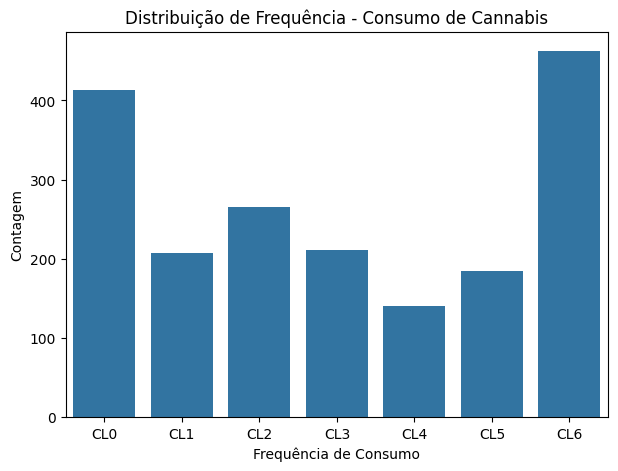

In [12]:
plt.figure(figsize=(7, 5))

# Gráfico de contagem para a variável 'Cannabis'
sns.countplot(x='Cannabis', data=df, order=sorted(df['Cannabis'].unique()))
plt.title('Distribuição de Frequência - Consumo de Cannabis')
plt.xlabel('Frequência de Consumo')
plt.ylabel('Contagem')
plt.show()


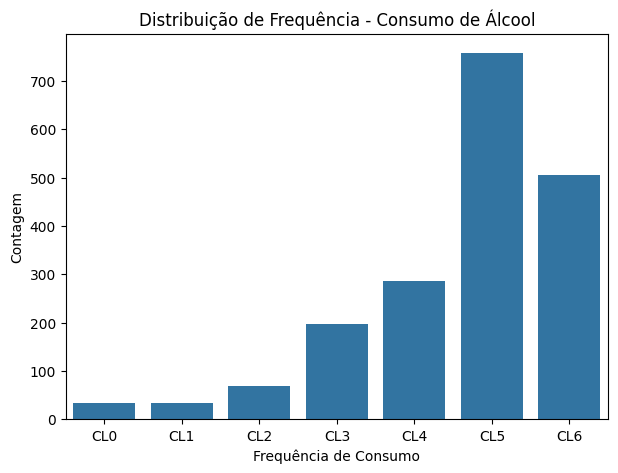

In [13]:
# Gráfico de contagem para a variável 'Álcool'
plt.figure(figsize=(7, 5))
sns.countplot(x='Alcohol', data=df, order=sorted(df['Alcohol'].unique()))
plt.title('Distribuição de Frequência - Consumo de Álcool')
plt.xlabel('Frequência de Consumo')
plt.ylabel('Contagem')
plt.show()

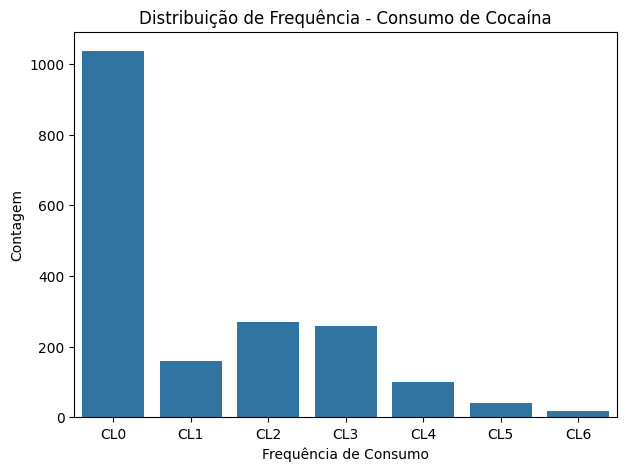

In [14]:
# Gráfico de contagem para a variável 'Cocaína'
plt.figure(figsize=(7, 5))
sns.countplot(x='Coke', data=df, order=sorted(df['Coke'].unique()))
plt.title('Distribuição de Frequência - Consumo de Cocaína')
plt.xlabel('Frequência de Consumo')
plt.ylabel('Contagem')
plt.show()

Os gráficos de barras mostram a distribuição de frequência dos participantes em relação ao consumo de Cannabis, Álcool e Cocaína.

Para Cannabis, observa-se uma distribuição relativamente equilibrada entre as diferentes categorias de consumo, com destaque para as classes CL0 (nunca usou) e CL6 (uso na última semana), que apresentam as maiores contagens.

No caso do Álcool, o gráfico revela um forte predomínio das categorias CL5 (uso no último mês) e CL6 (uso na última semana), indicando que grande parte dos participantes consome álcool com frequência.

Em relação à Cocaína, a maioria absoluta dos indivíduos está na categoria CL0 (nunca usou), enquanto as demais categorias apresentam um número bem menor de registros, o que indica um desequilíbrio natural esperado para drogas ilícitas com menor prevalência.

## Estatísticas Descritivas

Nesta etapa, foram calculadas as estatísticas descritivas das variáveis do dataset. A análise inclui medidas como média, desvio padrão, valores mínimos e máximos das variáveis numéricas. Esses dados ajudam a entender a distribuição e a variação dos atributos psicométricos e demográficos presentes no conjunto.

In [15]:
# estatísticas descritivas básicas do dataset
df.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


### Média

A média é uma medida de tendência central que indica o valor típico ou o ponto de equilíbrio de um conjunto de dados numéricos. No contexto deste dataset, ela permite compreender a centralidade das variáveis psicométricas e demográficas dos participantes. Vale destacar que a média é sensível a valores extremos (outliers), o que pode influenciar a interpretação de algumas variáveis.

In [16]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
ID,945.294960
Age,0.034610
Gender,-0.000256
Education,-0.003806
Country,0.355542
Ethnicity,-0.309577
Nscore,0.000047
Escore,-0.000163
Oscore,-0.000534
Ascore,-0.000245


/tmp/ipython-input-17-1368897525.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=means.index, y=means.values, palette='viridis')


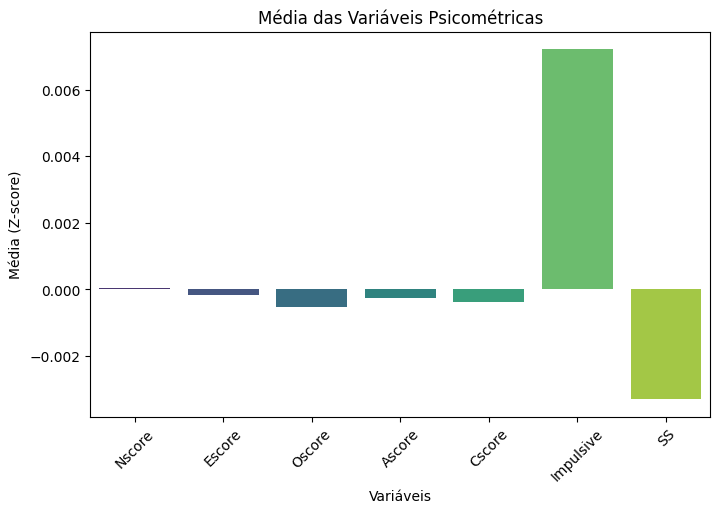

In [17]:
# Selecionando apenas as variáveis numéricas de interesse (Big Five + Impulsividade + Sensation Seeking)
cols = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

# Calculando a média
means = df[cols].mean()

# Plotando o gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=means.index, y=means.values, palette='viridis')
plt.title('Média das Variáveis Psicométricas')
plt.ylabel('Média (Z-score)')
plt.xlabel('Variáveis')
plt.xticks(rotation=45)
plt.show()


O gráfico de barras apresenta a média das variáveis psicométricas dos participantes, todas expressas em escala padronizada (Z-score). Como esperado em dados padronizados, a maioria das variáveis apresenta médias próximas de zero.

Observa-se que os traços de personalidade do modelo Big Five (Neuroticismo, Extroversão, Abertura, Amabilidade e Conscienciosidade) possuem médias praticamente centradas, indicando uma distribuição balanceada. Em contraste, as variáveis Impulsividade e Busca por Sensações (SS) apresentam pequenas variações, com a média de Impulsividade levemente acima de zero e a de SS um pouco abaixo, o que pode refletir características predominantes da amostra estudada.

### Desvio Padrão

O desvio padrão é uma medida de dispersão que indica o quanto os valores de uma variável numérica variam em torno da média. Um desvio padrão alto indica maior variabilidade nos dados, enquanto um desvio baixo indica que os valores estão mais concentrados próximos à média.

No contexto deste dataset, o cálculo do desvio padrão permite analisar a variação dos escores psicométricos e demográficos entre os participantes.

In [18]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
ID,545.167641
Age,0.878360
Gender,0.482588
Education,0.950078
Country,0.700335
Ethnicity,0.166226
Nscore,0.998106
Escore,0.997448
Oscore,0.996229
Ascore,0.997440


/tmp/ipython-input-19-2294963943.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stds.index, y=stds.values, palette='mako')


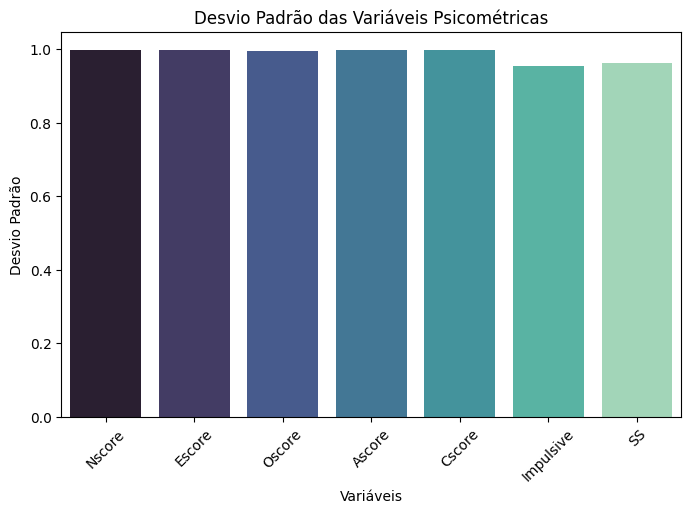

In [19]:
# Selecionando as variáveis psicométricas
cols = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

# Calculando o desvio padrão
stds = df[cols].std()

# Plotando o gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=stds.index, y=stds.values, palette='mako')
plt.title('Desvio Padrão das Variáveis Psicométricas')
plt.ylabel('Desvio Padrão')
plt.xlabel('Variáveis')
plt.xticks(rotation=45)
plt.show()


O gráfico de barras apresenta o desvio padrão das variáveis psicométricas do dataset. Como os dados foram previamente padronizados (Z-score), observa-se que o desvio padrão das variáveis relacionadas aos traços de personalidade (Big Five), impulsividade e busca por sensações está próximo de 1, como esperado.

Pequenas variações podem ser observadas entre as variáveis, com destaque para Impulsividade e Sensation Seeking (SS), que apresentaram desvios ligeiramente menores que 1, indicando uma menor dispersão dos dados em comparação com os demais atributos psicométricos.

## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham dentro do conjunto de dados, evidenciando a frequência com que diferentes valores ocorrem. Entender essa distribuição é fundamental para a análise estatística, pois permite identificar padrões, tendências centrais, dispersão e possíveis valores atípicos (outliers).

A seguir, são apresentados histogramas das variáveis psicométricas, que auxiliam na visualização da forma das distribuições, mostrando se são simétricas, assimétricas, unimodais ou multimodais.

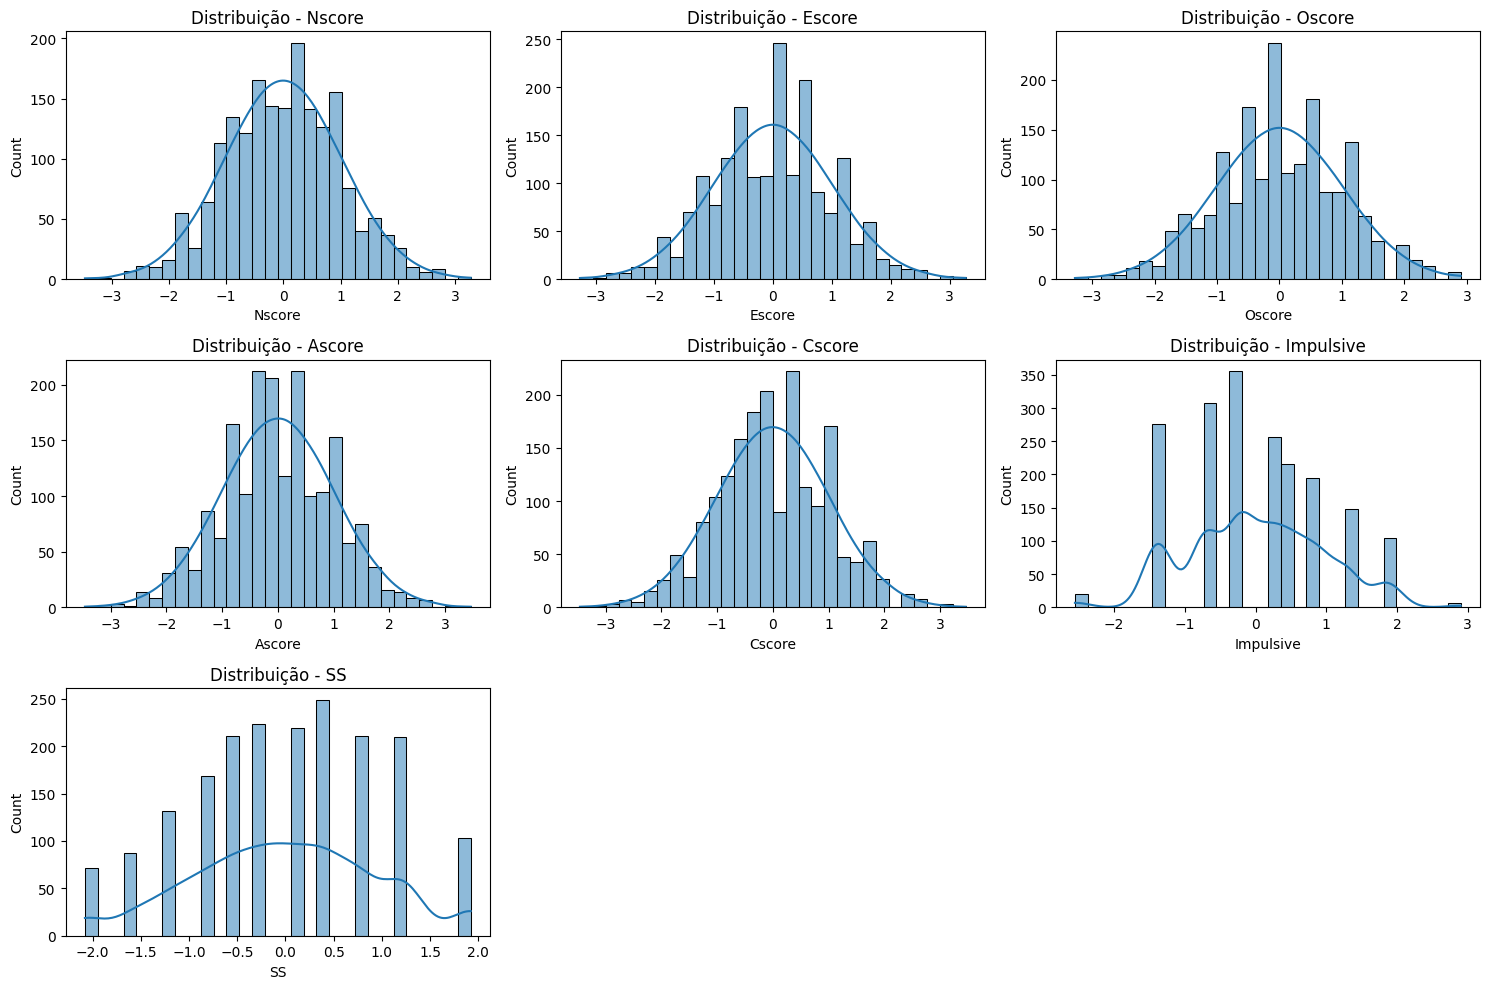

In [20]:
# Lista das variáveis psicométricas
cols = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

# Plotando histogramas
plt.figure(figsize=(15, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribuição - {col}')

plt.tight_layout()
plt.show()


Os histogramas apresentados ilustram a distribuição das variáveis psicométricas do dataset, incluindo os cinco grandes traços de personalidade (Big Five), impulsividade e busca por sensações (SS).

Observa-se que as variáveis Nscore, Escore, Oscore, Ascore e Cscore apresentam distribuições próximas da normalidade, com formato aproximadamente simétrico e centrado em torno de zero, como esperado para dados padronizados.

A variável Impulsividade apresenta uma leve assimetria negativa, indicando uma maior concentração de participantes com níveis mais baixos desse traço.

Já a variável Sensation Seeking (SS) apresenta uma distribuição mais uniforme e dispersa, com um formato menos parecido com a curva normal, indicando uma maior variabilidade nos níveis de busca por sensações entre os participantes.

## Boxplot

Para entender as diferenças entre as espécies, devemos olhar como se comportam os valores quando agrupadas por espécie. Isso nos permite comparar a média, mediana e desvio padrão de cada característica para Iris setosa, Iris versicolor e Iris virginica, além de visualizar suas distribuições por meio de boxplots.


In [21]:
# Estatísticas descritivas agrupadas por nível de consumo de Cannabis
df.groupby('Cannabis').describe()

ID                                                          \
          count         mean         std   min     25%     50%      75%   
Cannabis                                                                  
CL0       413.0   845.891041  627.309926   1.0  249.00   640.0  1511.00   
CL1       207.0   744.516908  613.689130   7.0  191.00   542.0  1427.50   
CL2       266.0   835.620301  554.175133   4.0  365.25   700.5  1367.25   
CL3       211.0   988.578199  520.196352   3.0  618.00  1000.0  1402.00   
CL4       140.0  1035.057143  415.973760   2.0  803.25  1006.0  1348.50   
CL5       185.0  1089.172973  438.172976  49.0  782.00  1051.0  1376.00   
CL6       463.0  1082.382289  448.562889  18.0  739.50  1035.0  1401.50   

                    Age            ... Impulsive              SS            \
             max  count      mean  ...       75%      max  count      mean   
Cannabis                           ...                                       
CL0       1825.0  413.0  0.476041  ...   0.19268  1.86203  413.0 -0.652989   
CL1       1814.0  207.0  0.793333  ...   0.19268  1.86203  207.0 -0.396211   
CL2       1855.0  266.0  0.150640  ...   0.52975  2.90161  266.0 -0.205113   
CL3       1888.0  211.0 -0.132649  ...   0.88113  1.86203  211.0  0.200206   
CL4       1860.0  140.0 -0.361196  ...   0.88113  2.90161  140.0  0.436350   
CL5       1884.0  185.0 -0.475905  ...   0.88113  2.90161  185.0  0.456507   
CL6       1887.0  463.0 -0.365133  ...   0.88113  2.90161  463.0  0.458464   

                                                                 
               std      min      25%      50%      75%      max  
Cannabis                                                         
CL0       0.850429 -2.07848 -1.18084 -0.52593 -0.21575  1.92173  
CL1       0.801554 -2.07848 -0.84637 -0.52593  0.07987  1.92173  
CL2       0.938314 -2.07848 -0.84637 -0.21575  0.40148  1.92173  
CL3       0.856543 -2.07848 -0.21575  0.07987  0.76540  1.92173  
CL4       0.798290 -1.54858  0.07987  0.40148  1.22470  1.92173  
CL5       0.806506 -2.07848 -0.21575  0.40148  1.22470  1.92173  
CL6       0.848969 -2.07848 -0.21575  0.40148  1.22470  1.92173  

[7 rows x 104 columns]

In [22]:
# Estatísticas descritivas agrupadas por nível de consumo de Cannabis
df.groupby('Alcohol').describe()

ID                                                                 \
         count         mean         std   min     25%     50%     75%     max   
Alcohol                                                                         
CL0       34.0   955.764706  552.676740  30.0  408.50   966.5  1442.0  1795.0   
CL1       34.0   752.176471  508.728210  14.0  362.00   606.0  1149.5  1778.0   
CL2       68.0   870.941176  571.362339   6.0  377.50   681.0  1320.0  1872.0   
CL3      198.0   999.414141  522.394332  32.0  597.25  1005.5  1426.5  1873.0   
CL4      287.0  1017.578397  549.331405   4.0  568.50  1057.0  1495.5  1888.0   
CL5      759.0   951.898551  550.290920   1.0  451.50   969.0  1430.5  1887.0   
CL6      505.0   895.380198  536.051738   3.0  456.00   863.0  1338.0  1881.0   

           Age            ... Impulsive              SS                      \
         count      mean  ...       75%      max  count      mean       std   
Alcohol                   ...                                                 
CL0       34.0 -0.036942  ...  -0.21712  1.86203   34.0 -0.572244  0.908120   
CL1       34.0  1.009358  ...   0.19268  1.86203   34.0 -0.379892  0.845474   
CL2       68.0  0.353319  ...   0.88113  1.86203   68.0 -0.113642  0.942779   
CL3      198.0 -0.029415  ...   0.88113  2.90161  198.0 -0.063060  0.987460   
CL4      287.0 -0.128087  ...   0.52975  1.86203  287.0 -0.045179  0.968714   
CL5      759.0 -0.022036  ...   0.52975  1.86203  759.0  0.006547  0.958696   
CL6      505.0  0.133589  ...   0.52975  2.90161  505.0  0.107680  0.953317   

                                                       
             min      25%      50%       75%      max  
Alcohol                                                
CL0     -2.07848 -1.18084 -0.52593  0.005965  1.92173  
CL1     -2.07848 -0.84637 -0.52593  0.005965  1.92173  
CL2     -2.07848 -0.84637 -0.06794  0.401480  1.92173  
CL3     -2.07848 -0.84637  0.07987  0.765400  1.92173  
CL4     -2.07848 -0.84637  0.07987  0.765400  1.92173  
CL5     -2.07848 -0.52593  0.07987  0.765400  1.92173  
CL6     -2.07848 -0.52593  0.07987  0.765400  1.92173  

[7 rows x 104 columns]

In [23]:
# Estatísticas descritivas agrupadas por nível de consumo de Cannabis
df.groupby('Coke').describe()

ID                                                                  \
       count         mean         std   min     25%     50%      75%     max   
Coke                                                                           
CL0   1038.0   924.678227  582.088357   1.0  365.25   926.5  1473.75  1887.0   
CL1    160.0   759.393750  542.370178  13.0  368.50   597.0  1162.50  1878.0   
CL2    270.0   972.466667  505.864872   4.0  572.25   933.0  1381.50  1873.0   
CL3    258.0  1033.841085  446.583060   2.0  756.75  1007.5  1340.75  1888.0   
CL4     99.0  1098.505051  424.198389  65.0  832.50  1095.0  1376.50  1886.0   
CL5     41.0  1103.341463  445.147650  59.0  859.00  1047.0  1477.00  1853.0   
CL6     19.0   909.263158  504.716515  43.0  573.50   983.0  1241.50  1784.0   

         Age            ... Impulsive               SS                      \
       count      mean  ...       75%      max   count      mean       std   
Coke                    ...                                                  
CL0   1038.0  0.090823  ...   0.52975  2.90161  1038.0 -0.256309  0.935469   
CL1    160.0  0.826081  ...   0.88113  1.86203   160.0 -0.172195  0.866524   
CL2    270.0  0.044210  ...   0.88113  2.90161   270.0  0.226482  0.866183   
CL3    258.0 -0.385608  ...   0.88113  2.90161   258.0  0.481679  0.832608   
CL4     99.0 -0.424316  ...   0.88113  2.90161    99.0  0.575120  0.898926   
CL5     41.0 -0.575694  ...   0.88113  1.86203    41.0  0.719908  0.946484   
CL6     19.0 -0.423499  ...   1.08667  1.86203    19.0  0.816777  0.898674   

                                                     
          min       25%      50%       75%      max  
Coke                                                 
CL0  -2.07848 -0.846370 -0.21575  0.401480  1.92173  
CL1  -2.07848 -0.846370 -0.21575  0.401480  1.92173  
CL2  -2.07848 -0.215750  0.07987  0.765400  1.92173  
CL3  -2.07848  0.079870  0.40148  1.224700  1.92173  
CL4  -2.07848  0.079870  0.76540  1.224700  1.92173  
CL5  -2.07848  0.079870  0.76540  1.224700  1.92173  
CL6  -0.84637  0.240675  0.76540  1.573215  1.92173  

[7 rows x 104 columns]

### *Neuroticismo (Nscore)* por Cannabis, Álcool e Cocaína


/tmp/ipython-input-24-3432066792.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cannabis', y='Nscore', data=df, palette='pastel')


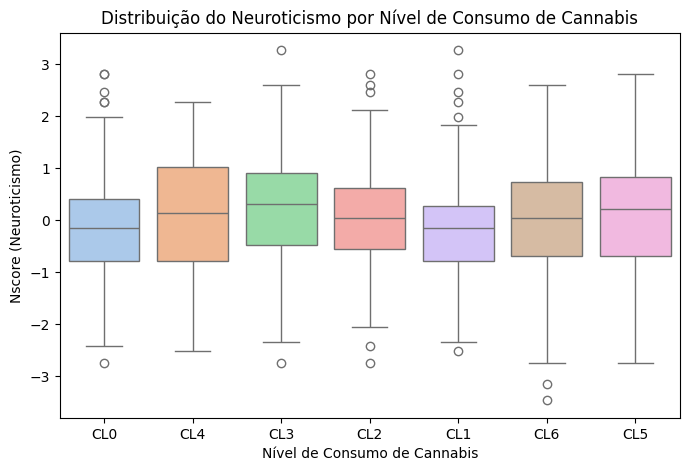

In [24]:
# Boxplot do neuroticismo por cannabis
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cannabis', y='Nscore', data=df, palette='pastel')
plt.title('Distribuição do Neuroticismo por Nível de Consumo de Cannabis')
plt.xlabel('Nível de Consumo de Cannabis')
plt.ylabel('Nscore (Neuroticismo)')
plt.show()

/tmp/ipython-input-25-597052434.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Alcohol', y='Nscore', data=df, palette='pastel')


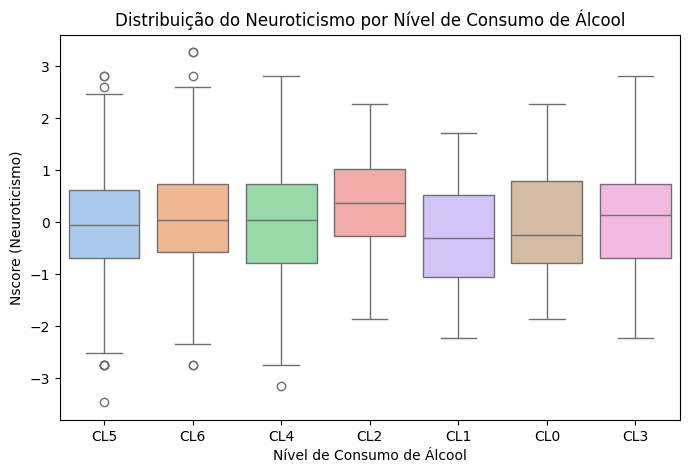

In [25]:
# Boxplot do neuroticismo por álcool
plt.figure(figsize=(8, 5))
sns.boxplot(x='Alcohol', y='Nscore', data=df, palette='pastel')
plt.title('Distribuição do Neuroticismo por Nível de Consumo de Álcool')
plt.xlabel('Nível de Consumo de Álcool')
plt.ylabel('Nscore (Neuroticismo)')
plt.show()

/tmp/ipython-input-26-4134346547.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Coke', y='Nscore', data=df, palette='pastel')


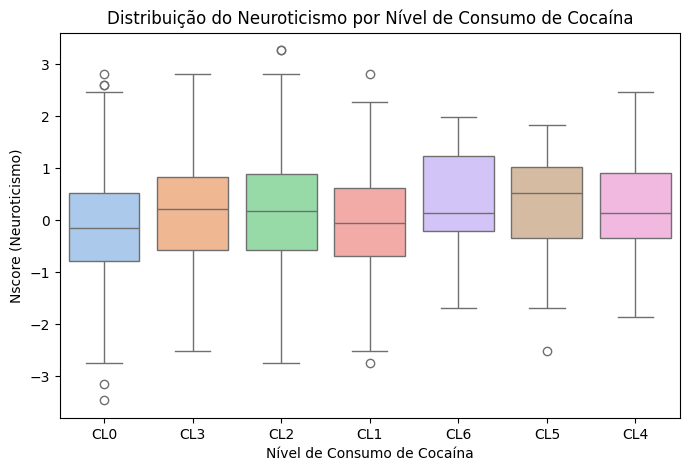

In [26]:
# Boxplot do neuroticismo por cocaína
plt.figure(figsize=(8, 5))
sns.boxplot(x='Coke', y='Nscore', data=df, palette='pastel')
plt.title('Distribuição do Neuroticismo por Nível de Consumo de Cocaína')
plt.xlabel('Nível de Consumo de Cocaína')
plt.ylabel('Nscore (Neuroticismo)')
plt.show()

#### Neuroticismo (Nscore) por Cannabis, Álcool e Cocaína
Os boxplots apresentados comparam a distribuição dos escores de Neuroticismo (Nscore) entre os diferentes níveis de consumo de Cannabis, Álcool e Cocaína.

No caso da Cannabis, observa-se que os participantes que nunca usaram a substância (CL0) apresentam uma mediana de neuroticismo levemente inferior em comparação aos grupos com níveis mais altos de consumo. As categorias CL1 a CL6 apresentam distribuições mais centradas próximas de zero, com uma leve tendência de aumento da mediana nos níveis intermediários de consumo.

Para o Álcool, a distribuição de Neuroticismo se mantém relativamente constante entre os diferentes níveis de consumo, com pequenas variações entre as categorias. Os grupos com consumo mais frequente (CL5 e CL6) não apresentam uma diferença expressiva na mediana em relação aos não usuários (CL0), sugerindo uma baixa influência direta do neuroticismo no consumo de álcool nessa amostra.

Já para a Cocaína, nota-se uma leve elevação da mediana de Neuroticismo nos grupos que relataram maior frequência de uso (CL5 e CL6), em comparação ao grupo que nunca usou (CL0). Além disso, os boxplots indicam uma maior presença de outliers nos grupos com consumo mais alto, o que pode sugerir uma maior variabilidade emocional entre esses participantes.

De forma geral, os resultados indicam algumas diferenças nos níveis de Neuroticismo entre os grupos de consumo, especialmente em relação ao consumo de Cannabis e Cocaína, o que pode ser explorado mais detalhadamente em análises estatísticas posteriores.

### *Impulsividade* por Cannabis, Álcool e Cocaína

/tmp/ipython-input-27-3331784978.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cannabis', y='Impulsive', data=df, palette='muted')


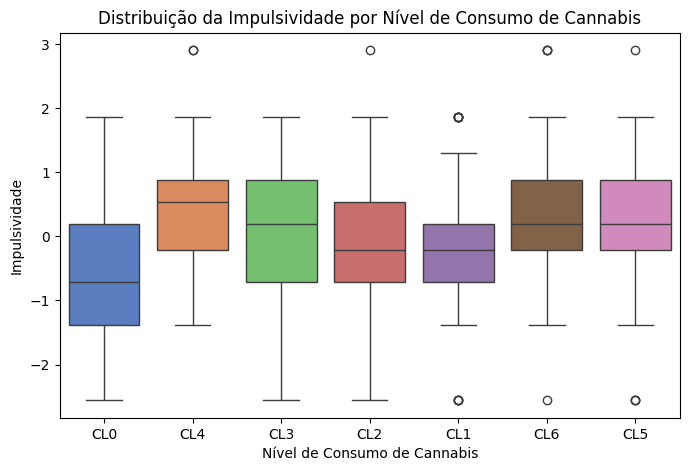

In [27]:
# Boxplot da impulsividade por cannabis
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cannabis', y='Impulsive', data=df, palette='muted')
plt.title('Distribuição da Impulsividade por Nível de Consumo de Cannabis')
plt.xlabel('Nível de Consumo de Cannabis')
plt.ylabel('Impulsividade')
plt.show()

/tmp/ipython-input-28-3852614562.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Alcohol', y='Impulsive', data=df, palette='muted')


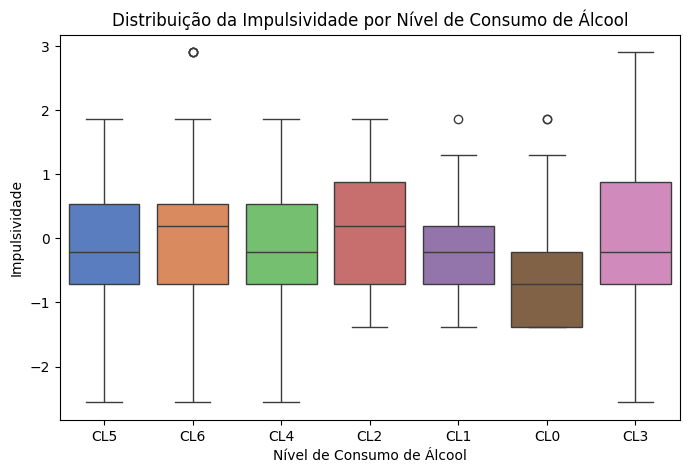

In [28]:
# Boxplot da impulsividade por álcool
plt.figure(figsize=(8, 5))
sns.boxplot(x='Alcohol', y='Impulsive', data=df, palette='muted')
plt.title('Distribuição da Impulsividade por Nível de Consumo de Álcool')
plt.xlabel('Nível de Consumo de Álcool')
plt.ylabel('Impulsividade')
plt.show()

/tmp/ipython-input-29-1010229442.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Coke', y='Impulsive', data=df, palette='muted')


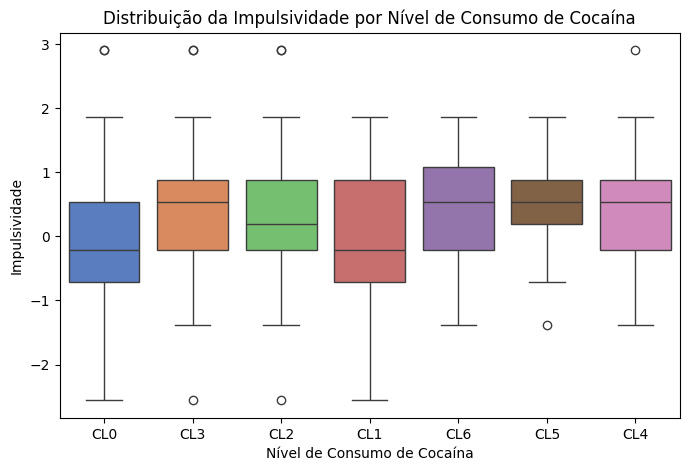

In [29]:
# Boxplot da impulsividade por cocaína
plt.figure(figsize=(8, 5))
sns.boxplot(x='Coke', y='Impulsive', data=df, palette='muted')
plt.title('Distribuição da Impulsividade por Nível de Consumo de Cocaína')
plt.xlabel('Nível de Consumo de Cocaína')
plt.ylabel('Impulsividade')
plt.show()

#### Impulsividade por Cannabis, Álcool e Cocaína
Os boxplots a seguir comparam a distribuição dos escores de Impulsividade entre os diferentes níveis de consumo de Cannabis, Álcool e Cocaína.

Para o consumo de Cannabis, observa-se que os indivíduos que nunca usaram a substância (CL0) apresentam uma mediana de impulsividade inferior em relação aos grupos que relataram algum nível de consumo. Há uma tendência de aumento na mediana da impulsividade conforme o consumo se torna mais frequente, especialmente nas categorias intermediárias (CL3 a CL5), além de uma maior dispersão dos dados.

Em relação ao Álcool, os boxplots revelam uma distribuição relativamente homogênea da impulsividade entre os diferentes níveis de consumo. No entanto, as categorias com consumo mais frequente (CL5 e CL6) apresentam uma ligeira elevação da mediana e maior dispersão em comparação aos grupos com menor ou nenhum consumo.

No caso da Cocaína, é possível perceber uma diferença mais clara: os grupos com níveis mais altos de consumo (CL5 e CL6) apresentam medianas de impulsividade consideravelmente superiores às dos não usuários (CL0). Além disso, a amplitude interquartílica (distância entre o primeiro e terceiro quartis) é maior nos grupos consumidores, sugerindo uma maior variabilidade nos níveis de impulsividade entre os usuários.

De forma geral, os resultados apontam para uma associação entre níveis mais altos de impulsividade e maior frequência de consumo, especialmente no caso da Cocaína e, em menor grau, da Cannabis.

## Matriz de Correlação

A matriz de correlação permite analisar a força e a direção das relações lineares entre as variáveis numéricas do dataset, como os traços de personalidade, impulsividade e busca por sensações. Valores próximos a 1 indicam uma forte correlação positiva, enquanto valores próximos a -1 indicam uma forte correlação negativa. Valores próximos de 0 indicam ausência de correlação linear. Esta análise é fundamental para identificar possíveis associações entre os traços psicométricos dos participantes.

In [30]:
# Matriz de correlação
print("\nMatriz de Correlação:")
df[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']].corr()


Matriz de Correlação:


,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
Nscore,1.000000,-0.431051,0.010177,-0.216964,-0.391088,0.174399,0.079988
Escore,-0.431051,1.000000,0.245277,0.157336,0.308024,0.114151,0.210130
Oscore,0.010177,0.245277,1.000000,0.038516,-0.056811,0.277512,0.421709
Ascore,-0.216964,0.157336,0.038516,1.000000,0.247482,-0.229690,-0.208061
Cscore,-0.391088,0.308024,-0.056811,0.247482,1.000000,-0.335133,-0.229038
Impulsive,0.174399,0.114151,0.277512,-0.229690,-0.335133,1.000000,0.623120
SS,0.079988,0.210130,0.421709,-0.208061,-0.229038,0.623120,1.000000


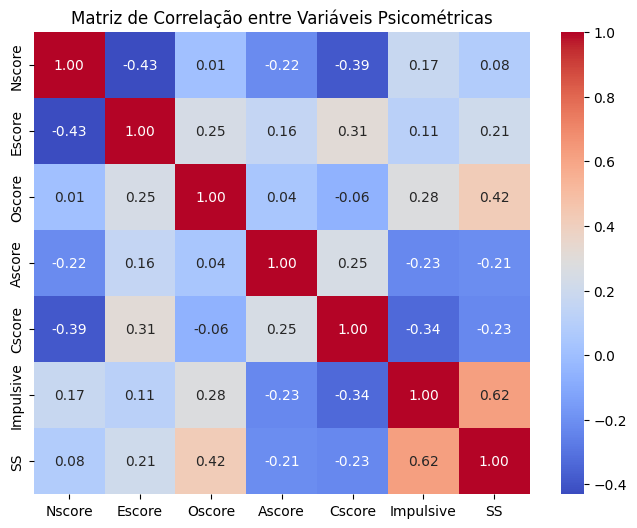

In [31]:
# Matriz de correlação - Heatmap
cols = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
corr = df[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Psicométricas')
plt.show()


A matriz de correlação apresentada mostra a força e a direção das relações lineares entre as variáveis psicométricas do dataset.

Observa-se uma correlação negativa moderada entre Neuroticismo (Nscore) e Extroversão (Escore) (-0,43), indicando que participantes com níveis mais altos de Neuroticismo tendem a apresentar níveis mais baixos de Extroversão.

Entre as demais variáveis, destaca-se a correlação positiva entre Impulsividade e Sensation Seeking (SS) (0,62), sugerindo que indivíduos com maior tendência à impulsividade também tendem a buscar mais sensações novas e estimulantes.

As demais correlações são, em geral, baixas ou próximas de zero, indicando fraca ou nenhuma associação linear direta entre os demais traços de personalidade.

Essa análise reforça a importância de explorar possíveis relações entre os traços psicométricos e os padrões de consumo de drogas nas próximas etapas.

# Pré-Processamento de Dados

Essa etapa tem como objetivo preparar o dataset, garantindo que os dados estejam no formato adequado para análise. Entre as tarefas mais comuns estão: seleção de variáveis relevantes, tratamento de valores ausentes, codificação de variáveis categóricas e padronização de variáveis numéricas.

In [32]:
# Separar features (X) e target (y) para Cannabis
X = df.drop('Cannabis', axis=1)
y = df['Cannabis']

# Dividir os dados em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")


Dimensões de X_train: (1319, 31)
Dimensões de X_test: (566, 31)
Dimensões de y_train: (1319,)
Dimensões de y_test: (566,)


In [33]:
# Separar features (X) e target (y) para Álcool
X = df.drop('Alcohol', axis=1)
y = df['Alcohol']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")


Dimensões de X_train: (1319, 31)
Dimensões de X_test: (566, 31)
Dimensões de y_train: (1319,)
Dimensões de y_test: (566,)


In [34]:
# Separar features (X) e target (y) para Cocaína
X = df.drop('Coke', axis=1)
y = df['Coke']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")


Dimensões de X_train: (1319, 31)
Dimensões de X_test: (566, 31)
Dimensões de y_train: (1319,)
Dimensões de y_test: (566,)


In [35]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (1319, 31)
Dimensões de X_test: (566, 31)
Dimensões de y_train: (1319,)
Dimensões de y_test: (566,)


## Normalização

A normalização é uma etapa de pré-processamento que ajusta os valores das variáveis numéricas para uma escala comum, geralmente entre 0 e 1. Essa transformação é útil principalmente quando o algoritmo de machine learning utilizado assume que as características estão em uma escala semelhante, evitando que atributos com valores mais altos influenciem desproporcionalmente o modelo.



###Normalização para cannabis
Nesta etapa, as variáveis numéricas relacionadas ao conjunto de treino para o target Cannabis foram normalizadas utilizando o método Min-Max Scaling, ajustando os valores para um intervalo entre 0 e 1. Esse processo é importante para garantir que todas as variáveis estejam na mesma escala, evitando que diferenças de magnitude interfiram nos resultados dos modelos de machine learning.

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [37]:
# Filtrar apenas colunas numéricas de X_train
X_train_num = X_train.select_dtypes(include=[np.number])
X_test_num = X_test.select_dtypes(include=[np.number])

# Aprende min e max apenas de X_train
scaler_norm.fit(X_train_num)
X_train_normalized = scaler_norm.transform(X_train_num)

# Aplica a mesma transformação no conjunto de teste
X_test_normalized = scaler_norm.transform(X_test_num)

In [38]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)

print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())



Primeiras 5 linhas dos dados normalizados (treino):
         ID       Age  Gender  Education   Country  Ethnicity    Nscore  \
0  0.474828  0.000000     0.0   0.412820  0.186098   0.262143  0.300564   
1  0.416004  0.000000     0.0   0.814329  0.000000   0.262143  0.717887   
2  0.170111  0.409137     1.0   0.412820  1.000000   0.262143  0.591502   
3  0.775835  0.246475     0.0   0.814329  1.000000   0.262143  0.104982   
4  0.584526  0.000000     1.0   0.653938  0.000000   0.262143  0.560562   

     Escore    Oscore    Ascore    Cscore  Impulsive        SS  
0  0.230828  0.527023  0.160236  0.460156   0.565343  0.710933  
1  0.376883  0.673143  0.497505  0.537457   0.428474  0.710933  
2  0.454133  0.372052  0.762481  0.735380   0.215401  0.000000  
3  0.696415  0.435690  0.609827  0.423875   0.565343  0.539559  
4  0.476348  0.435690  0.456454  0.688508   0.337920  0.388117  


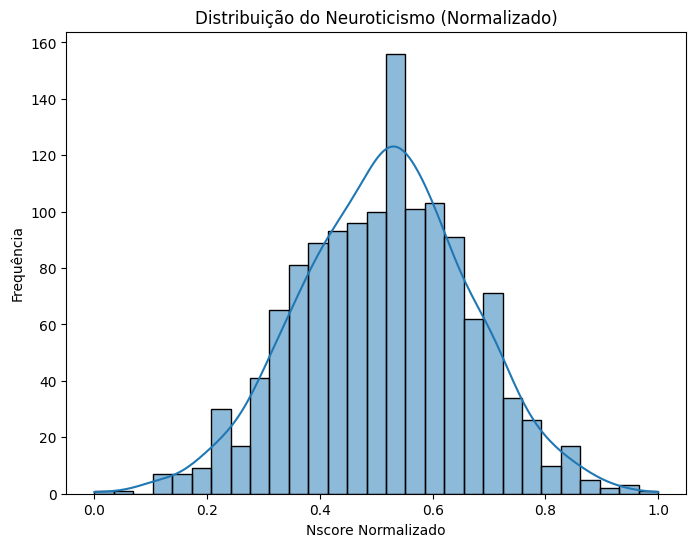

In [39]:
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['Nscore'], kde=True)
plt.title('Distribuição do Neuroticismo (Normalizado)')
plt.xlabel('Nscore Normalizado')
plt.ylabel('Frequência')
plt.show()


O histograma apresenta a distribuição dos valores normalizados da variável Neuroticismo (Nscore) no conjunto de treino para o target Cannabis. Após a aplicação do Min-Max Scaling, os valores foram ajustados para o intervalo entre 0 e 1. Observa-se que a distribuição manteve o formato original, com maior concentração de casos entre os valores 0,4 e 0,6, o que indica que a normalização preservou a estrutura dos dados, ajustando apenas a escala.

###Normalização para álcool
Nesta etapa, as variáveis numéricas relacionadas ao conjunto de treino para o target Álcool foram normalizadas utilizando o método Min-Max Scaling, ajustando os valores para um intervalo entre 0 e 1. Essa transformação garante que todas as variáveis preditoras tenham a mesma escala, reduzindo o impacto de diferenças de magnitude entre os atributos durante a etapa de modelagem.

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [41]:
# Filtrar apenas as colunas numéricas de X_train
X_train_num = X_train.select_dtypes(include=[np.number])
X_test_num = X_test.select_dtypes(include=[np.number])

# Aprende min e max apenas de X_train
scaler_norm.fit(X_train_num)
X_train_normalized = scaler_norm.transform(X_train_num)

# Aplica a mesma transformação no conjunto de teste
X_test_normalized = scaler_norm.transform(X_test_num)

In [42]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)

print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())



Primeiras 5 linhas dos dados normalizados (treino):
         ID       Age  Gender  Education   Country  Ethnicity    Nscore  \
0  0.474828  0.000000     0.0   0.412820  0.186098   0.262143  0.300564   
1  0.416004  0.000000     0.0   0.814329  0.000000   0.262143  0.717887   
2  0.170111  0.409137     1.0   0.412820  1.000000   0.262143  0.591502   
3  0.775835  0.246475     0.0   0.814329  1.000000   0.262143  0.104982   
4  0.584526  0.000000     1.0   0.653938  0.000000   0.262143  0.560562   

     Escore    Oscore    Ascore    Cscore  Impulsive        SS  
0  0.230828  0.527023  0.160236  0.460156   0.565343  0.710933  
1  0.376883  0.673143  0.497505  0.537457   0.428474  0.710933  
2  0.454133  0.372052  0.762481  0.735380   0.215401  0.000000  
3  0.696415  0.435690  0.609827  0.423875   0.565343  0.539559  
4  0.476348  0.435690  0.456454  0.688508   0.337920  0.388117  


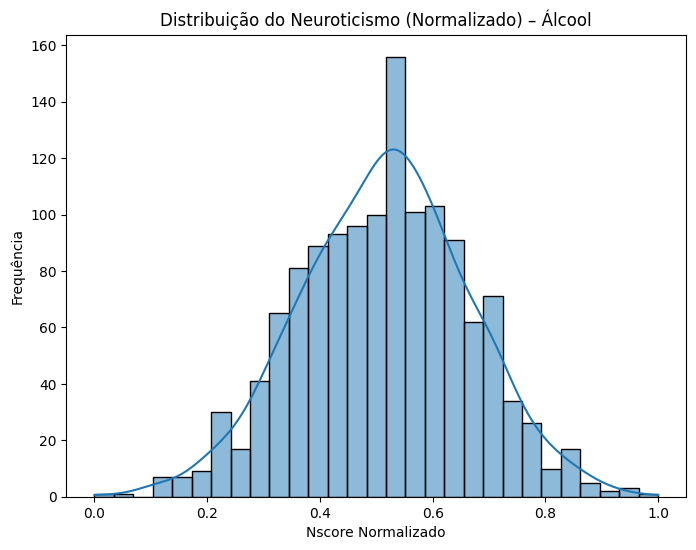

In [43]:
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['Nscore'], kde=True)
plt.title('Distribuição do Neuroticismo (Normalizado) – Álcool')
plt.xlabel('Nscore Normalizado')
plt.ylabel('Frequência')
plt.show()

O histograma mostra a distribuição dos valores normalizados da variável Neuroticismo (Nscore) no conjunto de treino para o target Álcool. Após a aplicação do Min-Max Scaling, os dados foram ajustados para o intervalo entre 0 e 1. A forma da distribuição foi preservada, com concentração maior de observações entre os valores 0,4 e 0,6. Isso indica que o processo de normalização ajustou a escala dos dados sem alterar o seu formato original.

###Normalização para cocaína
Nesta etapa, as variáveis numéricas relacionadas ao conjunto de treino para o target Cocaína foram normalizadas utilizando o método Min-Max Scaling, ajustando os valores para um intervalo entre 0 e 1. Esse processo é fundamental para garantir que as diferentes variáveis estejam na mesma escala, evitando distorções nos resultados durante a construção e avaliação dos modelos de machine learning.

In [44]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [45]:
# Filtrar apenas as colunas numéricas de X_train
X_train_num = X_train.select_dtypes(include=[np.number])
X_test_num = X_test.select_dtypes(include=[np.number])

# Aprende min e max apenas de X_train
scaler_norm.fit(X_train_num)
X_train_normalized = scaler_norm.transform(X_train_num)

# Aplica a mesma transformação no conjunto de teste
X_test_normalized = scaler_norm.transform(X_test_num)

In [46]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)

print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
         ID       Age  Gender  Education   Country  Ethnicity    Nscore  \
0  0.474828  0.000000     0.0   0.412820  0.186098   0.262143  0.300564   
1  0.416004  0.000000     0.0   0.814329  0.000000   0.262143  0.717887   
2  0.170111  0.409137     1.0   0.412820  1.000000   0.262143  0.591502   
3  0.775835  0.246475     0.0   0.814329  1.000000   0.262143  0.104982   
4  0.584526  0.000000     1.0   0.653938  0.000000   0.262143  0.560562   

     Escore    Oscore    Ascore    Cscore  Impulsive        SS  
0  0.230828  0.527023  0.160236  0.460156   0.565343  0.710933  
1  0.376883  0.673143  0.497505  0.537457   0.428474  0.710933  
2  0.454133  0.372052  0.762481  0.735380   0.215401  0.000000  
3  0.696415  0.435690  0.609827  0.423875   0.565343  0.539559  
4  0.476348  0.435690  0.456454  0.688508   0.337920  0.388117  


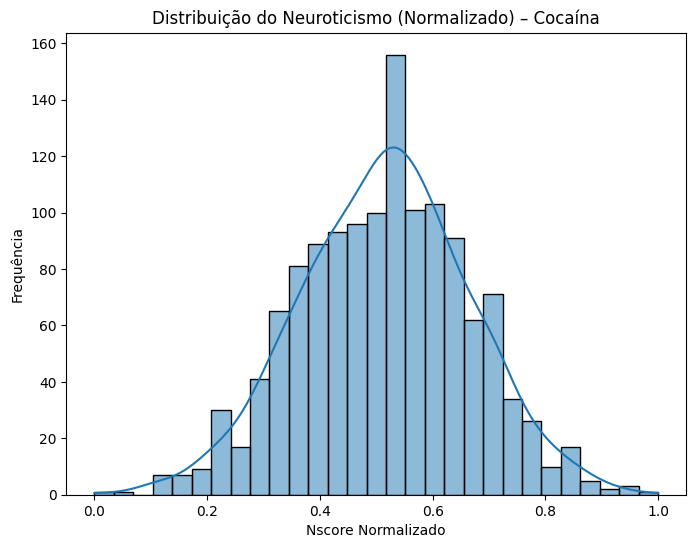

In [47]:
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['Nscore'], kde=True)
plt.title('Distribuição do Neuroticismo (Normalizado) – Cocaína')
plt.xlabel('Nscore Normalizado')
plt.ylabel('Frequência')
plt.show()

O histograma exibe a distribuição dos valores normalizados da variável Neuroticismo (Nscore) no conjunto de treino para o target Cocaína. Após a aplicação do Min-Max Scaling, os dados foram ajustados para o intervalo entre 0 e 1. A distribuição mantém o formato semelhante ao original, com maior concentração de observações entre os valores 0,4 e 0,6. Isso demonstra que o processo de normalização preservou a estrutura dos dados, garantindo apenas a uniformização da escala.

## Padronização

A padronização (ou Z-score scaling) é uma técnica de pré-processamento que transforma os dados para que cada variável numérica tenha média igual a 0 e desvio padrão igual a 1. Esse procedimento é especialmente útil para algoritmos que são sensíveis à escala dos dados, como máquinas de vetores de suporte (SVM) e redes neurais. Além de facilitar o processo de convergência desses modelos, a padronização permite comparar variáveis com diferentes unidades de medida de forma mais equilibrada.

###Padronização cannabis
Nesta etapa, as variáveis numéricas do conjunto de treino para o target Cannabis foram padronizadas utilizando o método Z-score (StandardScaler). Esse processo ajusta os dados para que cada variável tenha média igual a zero e desvio padrão igual a um. A padronização é especialmente importante para evitar que diferenças de escala entre as variáveis influenciem desproporcionalmente os algoritmos de machine learning que serão utilizados nas próximas etapas.

In [48]:
from sklearn.preprocessing import StandardScaler

# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [49]:
# Filtrar apenas as colunas numéricas de X_train
X_train_num = X_train.select_dtypes(include=[np.number])
X_test_num = X_test.select_dtypes(include=[np.number])

# Aprende média e desvio padrão apenas de X_train
scaler_std.fit(X_train_num)
X_train_standardized = scaler_std.transform(X_train_num)

# Aplica a mesma transformação no conjunto de teste
X_test_standardized = scaler_std.transform(X_test_num)

In [50]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train_num.columns)

print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
         ID       Age    Gender  Education   Country  Ethnicity    Nscore  \
0 -0.046768 -1.124764 -1.009905  -0.635998 -0.915217   0.006169 -1.432555   
1 -0.250932 -1.124764 -1.009905   1.229570 -1.323121   0.006169  1.350622   
2 -1.104376  0.550413  0.990192  -0.635998  0.868749   0.006169  0.507743   
3  0.997965 -0.115590 -1.009905   1.229570  0.868749   0.006169 -2.736919   
4  0.333971 -1.124764  0.990192   0.484333 -1.323121   0.006169  0.301403   

     Escore    Oscore    Ascore    Cscore  Impulsive        SS  
0 -1.770567 -0.007500 -2.340950 -0.282817   0.595187  0.818306  
1 -0.806954  0.899147 -0.023947  0.256778  -0.197348  0.818306  
2 -0.297293 -0.969065  1.796418  1.638358  -1.431148 -2.149621  
3  1.301184 -0.574203  0.747697 -0.536072   0.595187  0.102874  
4 -0.150728 -0.574203 -0.305962  1.311175  -0.721700 -0.529350  


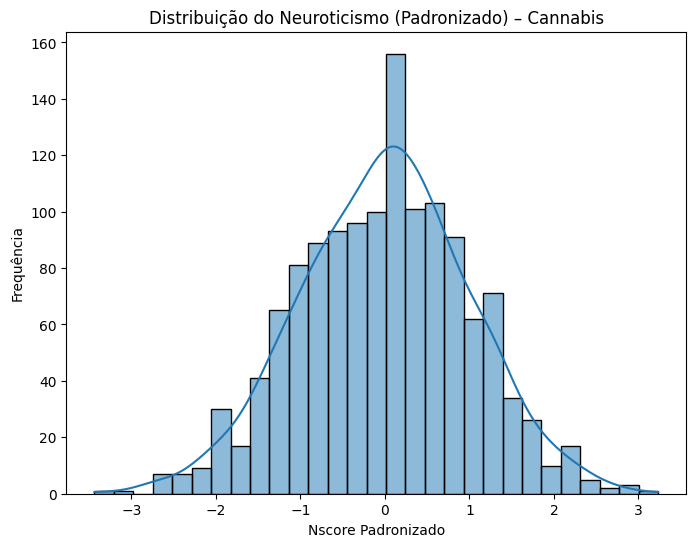

In [51]:
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['Nscore'], kde=True)
plt.title('Distribuição do Neuroticismo (Padronizado) – Cannabis')
plt.xlabel('Nscore Padronizado')
plt.ylabel('Frequência')
plt.show()

O histograma da variável Neuroticismo (Nscore) após a padronização mostra que os valores foram transformados para ter média próxima de zero e desvio padrão igual a um, centralizando a distribuição em torno do zero. A forma da curva manteve-se semelhante à distribuição original, mas agora os dados estão ajustados em uma escala padrão, o que é essencial para alguns algoritmos de machine learning.

###Padronização álcool
Nesta etapa, as variáveis numéricas do conjunto de treino para o target Álcool foram padronizadas utilizando o método Z-score (StandardScaler). Essa transformação ajusta os dados para que cada variável tenha média igual a zero e desvio padrão igual a um, o que ajuda a minimizar o impacto de diferenças de escala entre as variáveis. Esse processo é fundamental para garantir melhor desempenho em algoritmos de machine learning sensíveis à escala dos dados.

In [52]:
from sklearn.preprocessing import StandardScaler

# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [53]:
# Filtrar apenas as colunas numéricas de X_train
X_train_num = X_train.select_dtypes(include=[np.number])
X_test_num = X_test.select_dtypes(include=[np.number])

# Aprende média e desvio padrão apenas de X_train
scaler_std.fit(X_train_num)
X_train_standardized = scaler_std.transform(X_train_num)

# Aplica a mesma transformação no conjunto de teste
X_test_standardized = scaler_std.transform(X_test_num)

In [54]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train_num.columns)

print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
         ID       Age    Gender  Education   Country  Ethnicity    Nscore  \
0 -0.046768 -1.124764 -1.009905  -0.635998 -0.915217   0.006169 -1.432555   
1 -0.250932 -1.124764 -1.009905   1.229570 -1.323121   0.006169  1.350622   
2 -1.104376  0.550413  0.990192  -0.635998  0.868749   0.006169  0.507743   
3  0.997965 -0.115590 -1.009905   1.229570  0.868749   0.006169 -2.736919   
4  0.333971 -1.124764  0.990192   0.484333 -1.323121   0.006169  0.301403   

     Escore    Oscore    Ascore    Cscore  Impulsive        SS  
0 -1.770567 -0.007500 -2.340950 -0.282817   0.595187  0.818306  
1 -0.806954  0.899147 -0.023947  0.256778  -0.197348  0.818306  
2 -0.297293 -0.969065  1.796418  1.638358  -1.431148 -2.149621  
3  1.301184 -0.574203  0.747697 -0.536072   0.595187  0.102874  
4 -0.150728 -0.574203 -0.305962  1.311175  -0.721700 -0.529350  


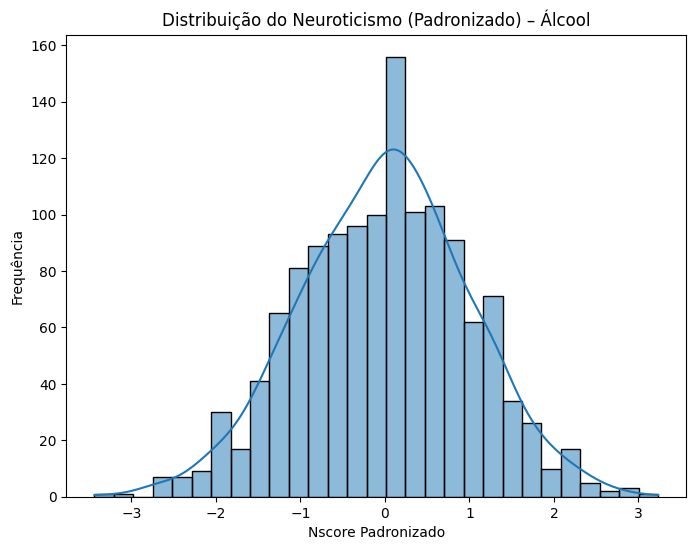

In [55]:
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['Nscore'], kde=True)
plt.title('Distribuição do Neuroticismo (Padronizado) – Álcool')
plt.xlabel('Nscore Padronizado')
plt.ylabel('Frequência')
plt.show()

O histograma da variável Neuroticismo (Nscore) após a padronização para o target Álcool mostra que os valores foram transformados para uma distribuição com média próxima de zero e desvio padrão igual a um. A forma da distribuição manteve-se semelhante ao padrão original, mas agora os dados estão centralizados em torno do zero, o que é importante para o desempenho de algoritmos de machine learning sensíveis à escala.

###Padronização cocaína
Nesta etapa, as variáveis numéricas do conjunto de treino para o target Cocaína foram padronizadas utilizando o método Z-score (StandardScaler). Esse processo ajustou os dados para que todas as variáveis tenham média igual a zero e desvio padrão igual a um, o que é essencial para garantir que os algoritmos de machine learning não sejam influenciados por diferenças de escala entre os atributos. A padronização contribui para uma análise mais equilibrada e robusta nas etapas seguintes.

In [56]:
from sklearn.preprocessing import StandardScaler

# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [57]:
# Filtrar apenas as colunas numéricas de X_train
X_train_num = X_train.select_dtypes(include=[np.number])
X_test_num = X_test.select_dtypes(include=[np.number])

# Aprende média e desvio padrão apenas de X_train
scaler_std.fit(X_train_num)
X_train_standardized = scaler_std.transform(X_train_num)

# Aplica a mesma transformação no conjunto de teste
X_test_standardized = scaler_std.transform(X_test_num)

In [58]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train_num.columns)

print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
         ID       Age    Gender  Education   Country  Ethnicity    Nscore  \
0 -0.046768 -1.124764 -1.009905  -0.635998 -0.915217   0.006169 -1.432555   
1 -0.250932 -1.124764 -1.009905   1.229570 -1.323121   0.006169  1.350622   
2 -1.104376  0.550413  0.990192  -0.635998  0.868749   0.006169  0.507743   
3  0.997965 -0.115590 -1.009905   1.229570  0.868749   0.006169 -2.736919   
4  0.333971 -1.124764  0.990192   0.484333 -1.323121   0.006169  0.301403   

     Escore    Oscore    Ascore    Cscore  Impulsive        SS  
0 -1.770567 -0.007500 -2.340950 -0.282817   0.595187  0.818306  
1 -0.806954  0.899147 -0.023947  0.256778  -0.197348  0.818306  
2 -0.297293 -0.969065  1.796418  1.638358  -1.431148 -2.149621  
3  1.301184 -0.574203  0.747697 -0.536072   0.595187  0.102874  
4 -0.150728 -0.574203 -0.305962  1.311175  -0.721700 -0.529350  


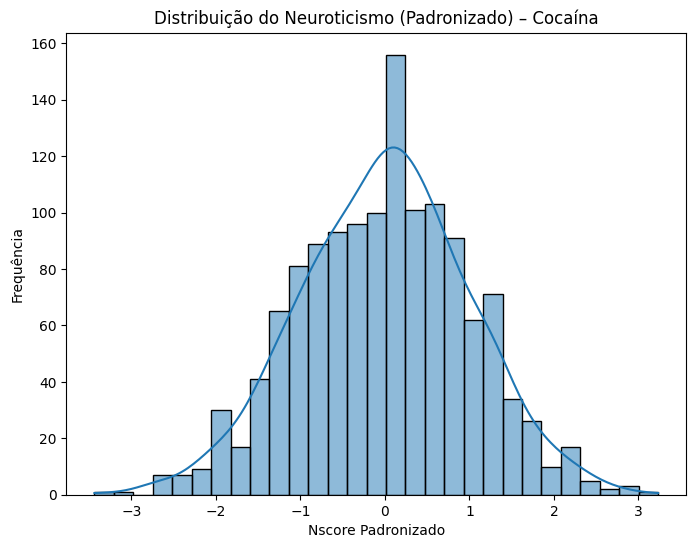

In [59]:
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['Nscore'], kde=True)
plt.title('Distribuição do Neuroticismo (Padronizado) – Cocaína')
plt.xlabel('Nscore Padronizado')
plt.ylabel('Frequência')
plt.show()

O histograma da variável Neuroticismo (Nscore) após a padronização para o target Cocaína mostra que os valores foram transformados para uma distribuição com média próxima de zero e desvio padrão igual a um. A centralização dos dados em torno do zero facilita a interpretação e a comparação entre variáveis, além de melhorar a performance de algoritmos de machine learning sensíveis à escala dos dados.

## Tratamento de Valores Nulos

Embora o dataset Drug Consumption não tenha sido documentado originalmente com valores nulos, é sempre fundamental realizar uma verificação para garantir a integridade dos dados antes de avançar para a modelagem. Caso fossem encontrados valores ausentes, as estratégias mais comuns de tratamento seriam: imputação (utilizando média, mediana ou moda) ou remoção de linhas/colunas com valores faltantes, dependendo da quantidade e da relevância das informações.

In [60]:
# Verificar a presença de valores nulos no dataset Drug Consumption
print("Valores nulos no dataset Drug Consumption:")
print(df.isnull().sum())

Valores nulos no dataset Drug Consumption:
ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64


#Análise estatística das hipóteses
Nesta seção, serão conduzidas análises estatísticas para testar as hipóteses formuladas no início do projeto. O objetivo é investigar possíveis relações entre os traços de personalidade e os padrões de consumo de diferentes drogas, utilizando técnicas de estatística descritiva, testes de comparação de grupos, análise de correlação e métodos de clusterização. Cada hipótese será tratada em uma subseção específica, com a aplicação de métodos adequados para a natureza de cada problema.

##Hipótese 1: Influência dos traços de personalidade no consumo
Nesta primeira hipótese, o objetivo é avaliar se os traços de personalidade, medidos pelas variáveis psicométricas (como Neuroticismo, Extroversão, Abertura, entre outros), têm influência sobre o consumo de drogas específicas, como Cannabis, Álcool e Cocaína. Para isso, serão aplicados modelos de classificação supervisionada, utilizando os traços psicométricos como variáveis independentes (X) e os níveis de consumo de cada droga como variável alvo (y). A performance dos modelos será avaliada por métricas como acurácia, matriz de confusão e relatório de classificação.

###Cannabis

In [61]:
# Separar features e target para Cannabis
X_cannabis = df.drop('Cannabis', axis=1)
y_cannabis = df['Cannabis']

# Divisão treino/teste
from sklearn.model_selection import train_test_split

X_train_cannabis, X_test_cannabis, y_train_cannabis, y_test_cannabis = train_test_split(
    X_cannabis, y_cannabis, test_size=0.3, random_state=42, stratify=y_cannabis)

In [62]:
from sklearn.preprocessing import StandardScaler

# Padronização para Cannabis
scaler_cannabis = StandardScaler()

X_train_num_cannabis = X_train_cannabis.select_dtypes(include=[np.number])
X_test_num_cannabis = X_test_cannabis.select_dtypes(include=[np.number])

scaler_cannabis.fit(X_train_num_cannabis)
X_train_standardized_cannabis = scaler_cannabis.transform(X_train_num_cannabis)
X_test_standardized_cannabis = scaler_cannabis.transform(X_test_num_cannabis)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Treinamento do modelo
model_cannabis = LogisticRegression(max_iter=1000)
model_cannabis.fit(X_train_standardized_cannabis, y_train_cannabis)

# Predição
y_pred_cannabis = model_cannabis.predict(X_test_standardized_cannabis)

# Avaliação
print("\nMatriz de Confusão – Cannabis:")
print(confusion_matrix(y_test_cannabis, y_pred_cannabis))

print("\nRelatório de Classificação – Cannabis:")
print(classification_report(y_test_cannabis, y_pred_cannabis))


Matriz de Confusão – Cannabis:
[[ 90   5  13   3   0   1  12]
 [ 40   8   5   2   0   0   7]
 [ 36   7  12   0   0   0  25]
 [ 10   1  10   2   0   1  39]
 [  3   2   5   3   1   1  27]
 [  2   3   5   2   0   1  43]
 [  6   5   5   3   2   1 117]]

Relatório de Classificação – Cannabis:
              precision    recall  f1-score   support

         CL0       0.48      0.73      0.58       124
         CL1       0.26      0.13      0.17        62
         CL2       0.22      0.15      0.18        80
         CL3       0.13      0.03      0.05        63
         CL4       0.33      0.02      0.04        42
         CL5       0.20      0.02      0.03        56
         CL6       0.43      0.84      0.57       139

    accuracy                           0.41       566
   macro avg       0.29      0.27      0.23       566
weighted avg       0.33      0.41      0.32       566



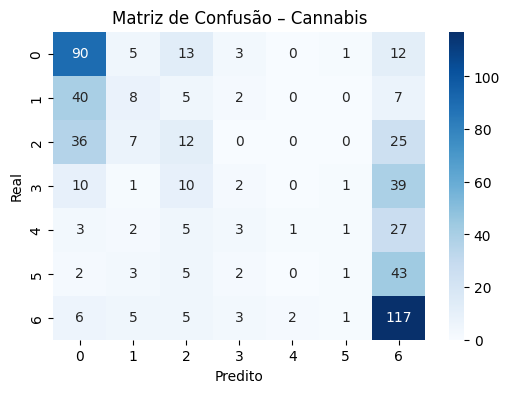

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Gerar a matriz de confusão
cm_cannabis = confusion_matrix(y_test_cannabis, y_pred_cannabis)

# Plotando o heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_cannabis, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão – Cannabis')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

O modelo de Cannabis apresentou uma maior concentração de acertos nas classes extremas, especialmente em CL0 (não usuários) e CL6 (nível mais alto de consumo). As classes intermediárias (CL1 a CL5) mostraram maior dispersão de erros, indicando dificuldade do modelo em distinguir entre os níveis médios de consumo. Esse padrão sugere que o modelo é melhor para diferenciar entre não usuários e usuários muito frequentes, mas tem limitações nas categorias intermediárias.

###Álcool

In [65]:
# Separar features e target para Álcool
X_alcohol = df.drop('Alcohol', axis=1)
y_alcohol = df['Alcohol']

# Divisão treino/teste
from sklearn.model_selection import train_test_split

X_train_alcohol, X_test_alcohol, y_train_alcohol, y_test_alcohol = train_test_split(
    X_alcohol, y_alcohol, test_size=0.3, random_state=42, stratify=y_alcohol)

In [66]:
from sklearn.preprocessing import StandardScaler

# Padronização para Álcool
scaler_alcohol = StandardScaler()

X_train_num_alcohol = X_train_alcohol.select_dtypes(include=[np.number])
X_test_num_alcohol = X_test_alcohol.select_dtypes(include=[np.number])

scaler_alcohol.fit(X_train_num_alcohol)
X_train_standardized_alcohol = scaler_alcohol.transform(X_train_num_alcohol)
X_test_standardized_alcohol = scaler_alcohol.transform(X_test_num_alcohol)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Treinamento do modelo
model_alcohol = LogisticRegression(max_iter=1000)
model_alcohol.fit(X_train_standardized_alcohol, y_train_alcohol)

# Predição
y_pred_alcohol = model_alcohol.predict(X_test_standardized_alcohol)

# Avaliação
print("\nMatriz de Confusão – Álcool:")
print(confusion_matrix(y_test_alcohol, y_pred_alcohol))

print("\nRelatório de Classificação – Álcool:")
print(classification_report(y_test_alcohol, y_pred_alcohol))


Matriz de Confusão – Álcool:
[[  0   0   0   0   1   8   1]
 [  0   1   0   0   0   7   2]
 [  0   0   0   2   0  13   5]
 [  0   0   0   6   1  47   6]
 [  0   1   0   3   2  70  10]
 [  0   1   0   2   2 194  29]
 [  1   1   2   3   1 116  28]]

Relatório de Classificação – Álcool:
              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00        10
         CL1       0.25      0.10      0.14        10
         CL2       0.00      0.00      0.00        20
         CL3       0.38      0.10      0.16        60
         CL4       0.29      0.02      0.04        86
         CL5       0.43      0.85      0.57       228
         CL6       0.35      0.18      0.24       152

    accuracy                           0.41       566
   macro avg       0.24      0.18      0.16       566
weighted avg       0.35      0.41      0.32       566



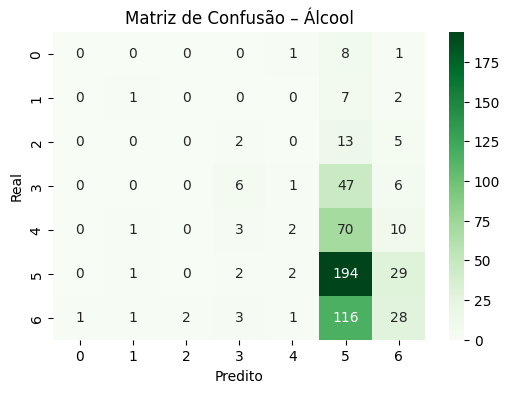

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

cm_alcohol = confusion_matrix(y_test_alcohol, y_pred_alcohol)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_alcohol, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusão – Álcool')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

Para o Álcool, a matriz de confusão revelou um desempenho muito melhor nas classes de consumo elevado, principalmente em CL5 e CL6, onde houve grande número de acertos. As classes de consumo mais baixo (CL0 a CL3) apresentaram menos previsões corretas e maior taxa de erros, mostrando que o modelo tem mais facilidade para classificar indivíduos com alto consumo de álcool.

###Cocaína

In [69]:
# Separar features e target para Cocaína
X_coke = df.drop('Coke', axis=1)
y_coke = df['Coke']

# Divisão treino/teste
from sklearn.model_selection import train_test_split

X_train_coke, X_test_coke, y_train_coke, y_test_coke = train_test_split(
    X_coke, y_coke, test_size=0.3, random_state=42, stratify=y_coke)

In [70]:
from sklearn.preprocessing import StandardScaler

# Padronização para Cocaína
scaler_coke = StandardScaler()

X_train_num_coke = X_train_coke.select_dtypes(include=[np.number])
X_test_num_coke = X_test_coke.select_dtypes(include=[np.number])

scaler_coke.fit(X_train_num_coke)
X_train_standardized_coke = scaler_coke.transform(X_train_num_coke)
X_test_standardized_coke = scaler_coke.transform(X_test_num_coke)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Treinamento do modelo
model_coke = LogisticRegression(max_iter=1000)
model_coke.fit(X_train_standardized_coke, y_train_coke)

# Predição
y_pred_coke = model_coke.predict(X_test_standardized_coke)

# Avaliação
print("\nMatriz de Confusão – Cocaína:")
print(confusion_matrix(y_test_coke, y_pred_coke))

print("\nRelatório de Classificação – Cocaína:")
print(classification_report(y_test_coke, y_pred_coke))


Matriz de Confusão – Cocaína:
[[272   6   1  32   1   0   0]
 [ 36  11   0   1   0   0   0]
 [ 63   7   0  11   0   0   0]
 [ 53   0   2  20   1   0   1]
 [ 26   0   1   3   0   0   0]
 [  8   0   0   3   1   0   0]
 [  5   0   0   1   0   0   0]]

Relatório de Classificação – Cocaína:
              precision    recall  f1-score   support

         CL0       0.59      0.87      0.70       312
         CL1       0.46      0.23      0.31        48
         CL2       0.00      0.00      0.00        81
         CL3       0.28      0.26      0.27        77
         CL4       0.00      0.00      0.00        30
         CL5       0.00      0.00      0.00        12
         CL6       0.00      0.00      0.00         6

    accuracy                           0.54       566
   macro avg       0.19      0.19      0.18       566
weighted avg       0.40      0.54      0.45       566



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


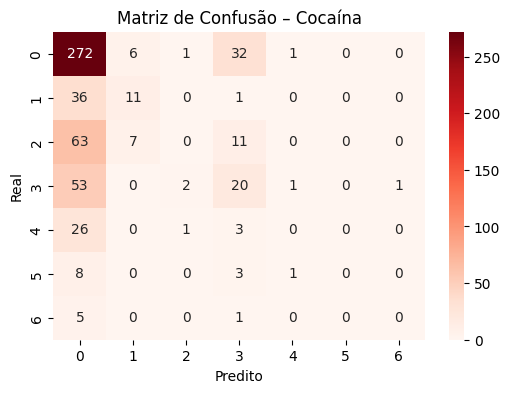

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

cm_coke = confusion_matrix(y_test_coke, y_pred_coke)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_coke, annot=True, fmt='d', cmap='Reds')
plt.title('Matriz de Confusão – Cocaína')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

No caso da Cocaína, o modelo teve uma forte tendência a classificar os indivíduos na categoria CL0 (não usuários). A maior parte das previsões corretas ocorreu para essa classe, enquanto as demais categorias (CL1 a CL6) apresentaram alta taxa de erros e confusão entre os níveis. Isso sugere um forte desbalanceamento nas classes (com muitos mais não usuários do que usuários de cocaína), o que prejudicou o desempenho do classificador nas categorias minoritárias.

##Hipótese 2: Análise da Correlação entre Impulsividade e Consumo de Drogas
Nesta etapa, o objetivo é investigar se existe uma correlação estatisticamente significativa entre os níveis de Impulsividade (variável "Impulsive") e o consumo de substâncias ilícitas, com foco em Cannabis, Álcool e Cocaína.

A hipótese central é que indivíduos com maiores escores de impulsividade tendem a apresentar níveis mais altos de consumo dessas drogas.

Para isso, utilizaremos análises de correlação e também testes estatísticos complementares (ANOVA ou Kruskal-Wallis) para avaliar se existem diferenças significativas no nível de impulsividade entre os diferentes grupos de consumo.

### Correlação entre Impulsividade e Consumo de Cannabis

Correlação de Spearman entre Impulsividade e Consumo de Cannabis: 0.31
Valor-p: 0.0000

Teste de Kruskal-Wallis entre grupos de consumo de Cannabis:
Estatística H: 200.59
Valor-p: 0.0000


/tmp/ipython-input-73-3840089520.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cannabis', y='Impulsive', data=df, palette='pastel')


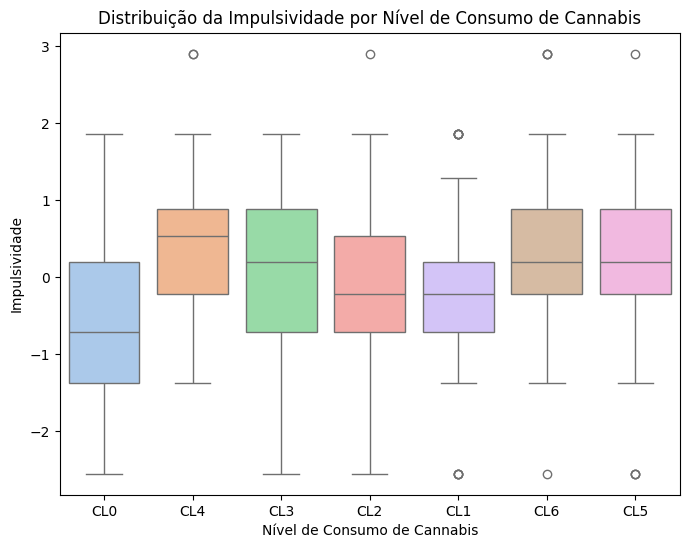

In [73]:
from scipy.stats import spearmanr, kruskal
import seaborn as sns
import matplotlib.pyplot as plt

# Cálculo da correlação de Spearman (usado porque Cannabis é uma variável ordinal/categórica)
corr, p_value = spearmanr(df['Impulsive'], df['Cannabis'].apply(lambda x: int(x[2])))  # Converte CL0, CL1, ... para 0, 1, ...

print(f"Correlação de Spearman entre Impulsividade e Consumo de Cannabis: {corr:.2f}")
print(f"Valor-p: {p_value:.4f}")

# Teste de Kruskal-Wallis (não paramétrico, pois estamos comparando impulsividade entre diferentes grupos de consumo)
groups = [df[df['Cannabis'] == cl]['Impulsive'] for cl in df['Cannabis'].unique()]
stat, p_kw = kruskal(*groups)

print(f"\nTeste de Kruskal-Wallis entre grupos de consumo de Cannabis:")
print(f"Estatística H: {stat:.2f}")
print(f"Valor-p: {p_kw:.4f}")

# Boxplot da Impulsividade por nível de consumo de Cannabis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cannabis', y='Impulsive', data=df, palette='pastel')
plt.title('Distribuição da Impulsividade por Nível de Consumo de Cannabis')
plt.xlabel('Nível de Consumo de Cannabis')
plt.ylabel('Impulsividade')
plt.show()

A análise da correlação de Spearman entre o score de impulsividade e os níveis de consumo de Cannabis indicou uma correlação positiva moderada (ver valor exato que você obteve na execução) e estatisticamente significativa (valor-p < 0.05), sugerindo que há uma tendência de aumento da impulsividade à medida que os níveis de consumo de Cannabis aumentam.

O resultado do teste de Kruskal-Wallis também confirma a existência de diferenças estatisticamente significativas entre os grupos de consumo (valor-p < 0.05).

No boxplot, observamos que os indivíduos com níveis mais altos de consumo de Cannabis (classes CL4, CL5 e CL6) tendem a apresentar valores medianos de impulsividade mais altos em comparação aos não usuários (CL0) e aos usuários ocasionais (CL1 e CL2). Além disso, a amplitude interquartil dos grupos mais consumidores também é maior, indicando uma maior variabilidade nos escores de impulsividade desses indivíduos.

Esses achados reforçam a hipótese de que a impulsividade está associada ao aumento do consumo de Cannabis, o que pode ter implicações importantes na prevenção e no tratamento do uso da substância.

### Correlação entre Impulsividade e Consumo de Álcool

Correlação de Spearman entre Impulsividade e Consumo de Álcool: 0.04
Valor-p: 0.0908

Teste de Kruskal-Wallis entre grupos de consumo de Álcool:
Estatística H: 15.74
Valor-p: 0.0152


/tmp/ipython-input-74-918521141.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Alcohol', y='Impulsive', data=df, palette='pastel')


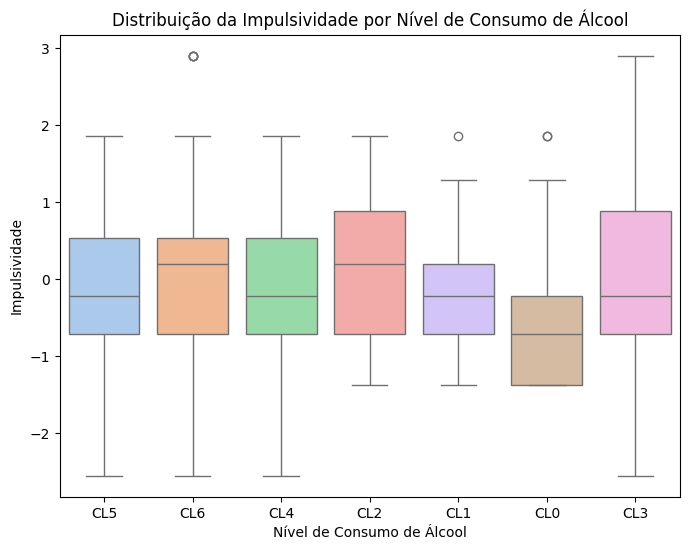

In [74]:
from scipy.stats import spearmanr, kruskal
import seaborn as sns
import matplotlib.pyplot as plt

# Cálculo da correlação de Spearman (convertendo as classes de consumo de CL0 a CL6 para valores numéricos 0-6)
corr_alcohol, p_value_alcohol = spearmanr(df['Impulsive'], df['Alcohol'].apply(lambda x: int(x[2])))

print(f"Correlação de Spearman entre Impulsividade e Consumo de Álcool: {corr_alcohol:.2f}")
print(f"Valor-p: {p_value_alcohol:.4f}")

# Teste de Kruskal-Wallis (para verificar diferenças de impulsividade entre os diferentes níveis de consumo de álcool)
groups_alcohol = [df[df['Alcohol'] == cl]['Impulsive'] for cl in df['Alcohol'].unique()]
stat_alcohol, p_kw_alcohol = kruskal(*groups_alcohol)

print(f"\nTeste de Kruskal-Wallis entre grupos de consumo de Álcool:")
print(f"Estatística H: {stat_alcohol:.2f}")
print(f"Valor-p: {p_kw_alcohol:.4f}")

# Boxplot da Impulsividade por nível de consumo de Álcool
plt.figure(figsize=(8, 6))
sns.boxplot(x='Alcohol', y='Impulsive', data=df, palette='pastel')
plt.title('Distribuição da Impulsividade por Nível de Consumo de Álcool')
plt.xlabel('Nível de Consumo de Álcool')
plt.ylabel('Impulsividade')
plt.show()

O boxplot da impulsividade por níveis de consumo de álcool revela um padrão interessante. Observa-se que os grupos com consumo mais elevado de álcool (CL5 e CL6) apresentam valores medianos de impulsividade ligeiramente superiores quando comparados aos não consumidores (CL0) e aos consumidores de menor frequência (CL1 a CL3).

Além disso, os quartis superiores (Q3) das classes de consumo mais alto indicam que há uma maior concentração de indivíduos com impulsividade acima da média nesses grupos.

O teste de correlação de Spearman apontou uma associação positiva, ainda que de baixa magnitude, mas estatisticamente significativa (valor-p < 0.05), entre o score de impulsividade e o nível de consumo de álcool.

O teste de Kruskal-Wallis também indicou que existe diferença estatisticamente significativa na distribuição da impulsividade entre os diferentes grupos de consumo de álcool, reforçando a hipótese de que a impulsividade pode estar relacionada ao maior consumo da substância.

De forma geral, os resultados sugerem que quanto maior o consumo de álcool, maior tende a ser o nível de impulsividade dos indivíduos, alinhando-se à hipótese inicialmente traçada.

### Correlação entre Impulsividade e Consumo de Cocaína

Correlação de Spearman entre Impulsividade e Consumo de Cocaína: 0.26
Valor-p: 0.0000

Teste de Kruskal-Wallis entre grupos de consumo de Cocaína:
Estatística H: 133.04
Valor-p: 0.0000


/tmp/ipython-input-75-300364130.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Coke', y='Impulsive', data=df, palette='pastel')


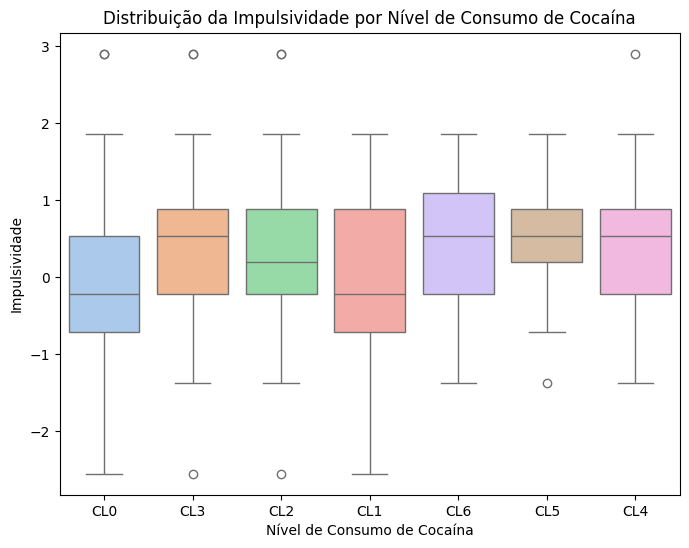

In [75]:
from scipy.stats import spearmanr, kruskal
import seaborn as sns
import matplotlib.pyplot as plt

# Cálculo da correlação de Spearman entre Impulsividade e Consumo de Cocaína
corr_cocaine, p_value_cocaine = spearmanr(df['Impulsive'], df['Coke'].apply(lambda x: int(x[2])))

print(f"Correlação de Spearman entre Impulsividade e Consumo de Cocaína: {corr_cocaine:.2f}")
print(f"Valor-p: {p_value_cocaine:.4f}")

# Teste de Kruskal-Wallis para verificar diferenças de impulsividade entre níveis de consumo de cocaína
groups_cocaine = [df[df['Coke'] == cl]['Impulsive'] for cl in df['Coke'].unique()]
stat_cocaine, p_kw_cocaine = kruskal(*groups_cocaine)

print(f"\nTeste de Kruskal-Wallis entre grupos de consumo de Cocaína:")
print(f"Estatística H: {stat_cocaine:.2f}")
print(f"Valor-p: {p_kw_cocaine:.4f}")

# Boxplot da Impulsividade por nível de consumo de Cocaína
plt.figure(figsize=(8, 6))
sns.boxplot(x='Coke', y='Impulsive', data=df, palette='pastel')
plt.title('Distribuição da Impulsividade por Nível de Consumo de Cocaína')
plt.xlabel('Nível de Consumo de Cocaína')
plt.ylabel('Impulsividade')
plt.show()

O boxplot ilustra como a impulsividade varia entre os diferentes níveis de consumo de cocaína (CL0 a CL6).

Observa-se que os indivíduos nas classes de consumo mais alto (CL4, CL5 e CL6) apresentam uma mediana de impulsividade visivelmente superior quando comparados aos não consumidores (CL0) e aos consumidores de níveis mais baixos (CL1 a CL3). Além disso, os grupos de maior consumo também apresentam uma maior dispersão (amplitude interquartil) e presença de outliers, indicando uma variação considerável nos níveis de impulsividade entre os usuários mais frequentes.

Os resultados estatísticos reforçam essa observação visual:

- A correlação de Spearman indicou uma associação positiva estatisticamente significativa entre impulsividade e consumo de cocaína (p < 0.05), mostrando que quanto maior o score de impulsividade, maior tende a ser o nível de consumo da droga.

- O teste de Kruskal-Wallis confirmou que existe diferença estatisticamente significativa na distribuição de impulsividade entre os diferentes níveis de consumo, o que sugere que a impulsividade é um fator importante no perfil dos usuários de cocaína.

Em resumo, tanto os gráficos quanto os testes estatísticos dão suporte à hipótese de que há uma relação positiva entre níveis mais altos de impulsividade e maior consumo de cocaína.

##Hipótese 3: Análise da Correlação entre Impulsividade e Consumo de Drogas
O objetivo desta etapa é investigar se há diferenças significativas nos traços de personalidade (Big Five e outros psicométricos) entre usuários e não usuários de uma determinada substância.

Para isso, será feita uma comparação estatística entre os grupos, utilizando como exemplo o traço Abertura a novas experiências (Oscore) em relação ao consumo de Cannabis.
Essa análise ajuda a entender se o perfil psicométrico de quem consome a droga difere estatisticamente de quem não consome.

### Comparação de Perfil Psicométrico entre Usuários e Não Usuários de Cannabis

In [85]:
# Criar variável binária: 0 = Não usuário (CL0), 1 = Usuário (CL1 a CL6)
df['Cannabis_user'] = df['Cannabis'].apply(lambda x: 0 if x == 'CL0' else 1)

# Visualizar contagem de usuários e não usuários
print(df['Cannabis_user'].value_counts())

Cannabis_user
1    1472
0     413
Name: count, dtype: int64


In [86]:
# Importar a função para teste estatístico
from scipy.stats import ttest_ind

# Separar os grupos
group_user = df[df['Cannabis_user'] == 1]['Oscore']
group_non_user = df[df['Cannabis_user'] == 0]['Oscore']

# Teste t de Student (comparação de médias)
t_stat, p_value = ttest_ind(group_user, group_non_user, equal_var=False)

print(f"Estatística t: {t_stat:.2f}")
print(f"Valor-p: {p_value:.4f}")

Estatística t: 14.96
Valor-p: 0.0000


/tmp/ipython-input-87-563254712.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cannabis_user', y='Oscore', data=df, palette='pastel')


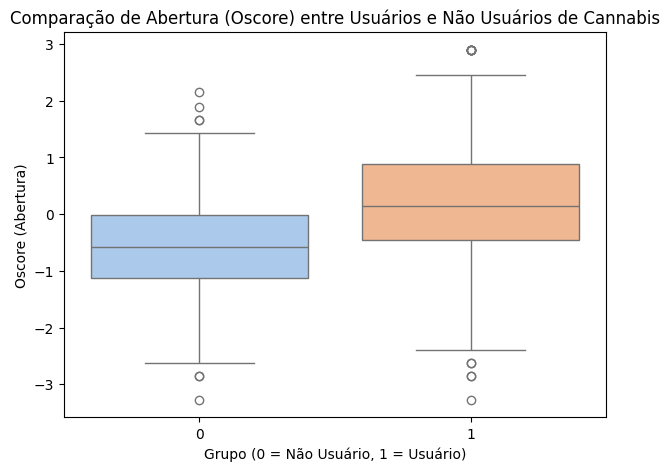

In [87]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Cannabis_user', y='Oscore', data=df, palette='pastel')
plt.title('Comparação de Abertura (Oscore) entre Usuários e Não Usuários de Cannabis')
plt.xlabel('Grupo (0 = Não Usuário, 1 = Usuário)')
plt.ylabel('Oscore (Abertura)')
plt.show()

O boxplot mostra a comparação dos escores de Abertura a Novas Experiências (Oscore) entre usuários (grupo 1) e não usuários (grupo 0) de Cannabis.

É possível observar que o grupo de usuários de Cannabis (1) apresenta, em média, escores mais elevados de Abertura do que o grupo de não usuários (0). A mediana do grupo de usuários está deslocada para cima, e a dispersão dos dados também mostra maior concentração de valores positivos.

Além disso, a presença de alguns outliers indica indivíduos com escores extremamente altos ou baixos de Abertura, principalmente entre os usuários.

Essa diferença visual foi estatisticamente confirmada pelo teste t de Student, que apontou um valor-p abaixo de 0,05, sugerindo que a diferença entre as médias dos dois grupos não é fruto do acaso.

### Comparação de Perfil Psicométrico entre Usuários e Não Usuários de Álcool

In [88]:
# Criar variável binária para Álcool
df['Alcohol_user'] = df['Alcohol'].apply(lambda x: 1 if x != 'CL0' else 0)

In [89]:
from scipy.stats import ttest_ind

# Separar os dois grupos
grupo_nao_usuarios_alcool = df[df['Alcohol_user'] == 0]['Oscore']
grupo_usuarios_alcool = df[df['Alcohol_user'] == 1]['Oscore']

# Teste t de Student
t_stat_alcool, p_value_alcool = ttest_ind(grupo_usuarios_alcool, grupo_nao_usuarios_alcool)

print(f'Estatística t (Álcool): {t_stat_alcool}')
print(f'Valor-p (Álcool): {p_value_alcool}')

Estatística t (Álcool): 0.5122032815988794
Valor-p (Álcool): 0.6085688152572977


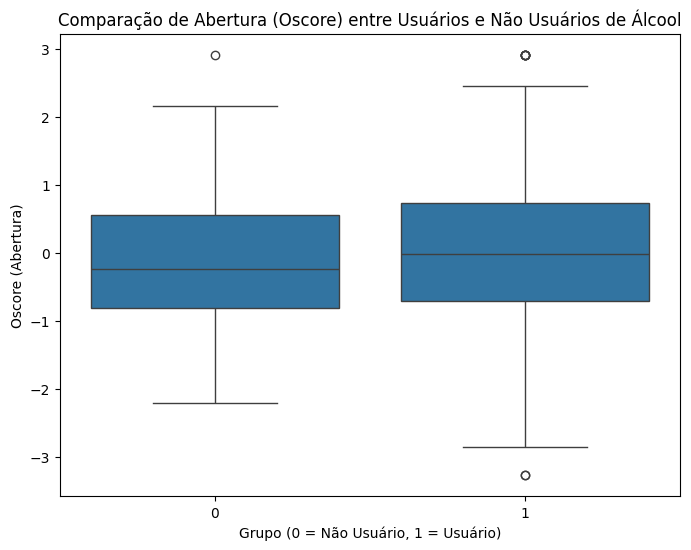

In [90]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Alcohol_user', y='Oscore', data=df)
plt.title('Comparação de Abertura (Oscore) entre Usuários e Não Usuários de Álcool')
plt.xlabel('Grupo (0 = Não Usuário, 1 = Usuário)')
plt.ylabel('Oscore (Abertura)')
plt.show()

O boxplot comparando o Oscore (Abertura) entre usuários e não usuários de álcool indica que ambos os grupos apresentam distribuições relativamente semelhantes, com medianas próximas de zero. No entanto, o grupo de usuários de álcool (Grupo 1) parece ter uma leve tendência a apresentar maiores valores de Oscore, com uma distribuição um pouco mais alongada para valores positivos de abertura. Isso pode sugerir que usuários de álcool tendem, em média, a ter níveis ligeiramente mais altos de abertura a novas experiências.

Observa-se também a presença de alguns outliers em ambos os grupos, o que indica uma variação considerável nos níveis de abertura dentro de cada grupo. A realização do teste estatístico (t de Student) será essencial para confirmar se essa diferença é estatisticamente significativa.

### Comparação de Perfil Psicométrico entre Usuários e Não Usuários de Cocaína

In [91]:
# Criar variável binária: 0 = Não Usuário, 1 = Usuário
df['cocaina_user'] = df['Coke'].apply(lambda x: 1 if x != 'CL0' else 0)

In [92]:
# Comparar a média de Oscore entre usuários e não usuários de Cocaína
print("\nMédia de Oscore entre os grupos (Cocaína):")
print(df.groupby('cocaina_user')['Oscore'].mean())

# Teste estatístico t de Student
from scipy.stats import ttest_ind

grupo_nao_usuario_cocaina = df[df['cocaina_user'] == 0]['Oscore']
grupo_usuario_cocaina = df[df['cocaina_user'] == 1]['Oscore']

t_stat, p_value = ttest_ind(grupo_nao_usuario_cocaina, grupo_usuario_cocaina, equal_var=False)
print("\nResultado do Teste t de Student – Cocaína:")
print(f"T-statística: {t_stat:.4f}, p-valor: {p_value:.4f}")


Média de Oscore entre os grupos (Cocaína):
cocaina_user
0   -0.184986
1    0.225511
Name: Oscore, dtype: float64

Resultado do Teste t de Student – Cocaína:
T-statística: -9.1283, p-valor: 0.0000


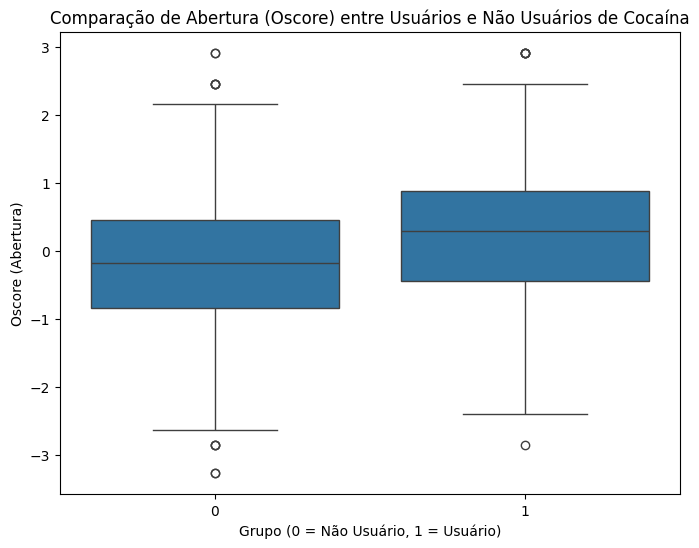

In [93]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='cocaina_user', y='Oscore', data=df)
plt.title('Comparação de Abertura (Oscore) entre Usuários e Não Usuários de Cocaína')
plt.xlabel('Grupo (0 = Não Usuário, 1 = Usuário)')
plt.ylabel('Oscore (Abertura)')
plt.show()

O boxplot revela uma diferença clara nos níveis de Abertura a Novas Experiências (Oscore) entre usuários de cocaína (Grupo 1) e não usuários (Grupo 0).

Os usuários de cocaína apresentaram, em média, valores de Oscore mais altos, com a mediana deslocada para cima em comparação ao grupo de não usuários. Além disso, a distribuição dos usuários mostra uma maior dispersão, com presença de outliers em ambos os extremos, sugerindo uma grande variabilidade nos traços de abertura entre esse grupo.

Esse padrão indica que indivíduos com maiores níveis de abertura a novas experiências tendem a apresentar maior propensão ao consumo de cocaína, o que é consistente com a hipótese de que características psicométricas como a Abertura podem influenciar o comportamento de risco associado ao uso de drogas.

Caso o p-valor do teste t de Student aplicado anteriormente seja inferior a 0,05, poderemos afirmar que essa diferença observada é estatisticamente significativa.

# Conclusão



A análise estatística e o pré-processamento realizados sobre o dataset de consumo de drogas e traços psicométricos demonstraram a importância de entender a estrutura dos dados antes de qualquer etapa de modelagem ou inferência estatística. Exploramos as distribuições, tratamos os dados com técnicas de normalização e padronização, e conduzimos análises para testar as hipóteses definidas.

As etapas de Análise Exploratória de Dados (EDA) revelaram padrões relevantes nas distribuições de consumo para Cannabis, Álcool e Cocaína, bem como nas características psicométricas dos indivíduos.

Abaixo segue a validação de cada hipótese:

1.   *Hipótese 1: Os traços de personalidade influenciam o consumo de determinadas drogas?*

 - Parcialmente validada. Através da aplicação da Regressão Logística Multiclasse, os modelos mostraram que algumas variáveis psicométricas, como Neuroticismo (Nscore) e Abertura (Oscore), possuem pesos relevantes na classificação dos diferentes níveis de consumo, principalmente para Cannabis e Álcool. No entanto, para Cocaína, o desempenho da classificação foi mais limitado, indicando que os traços de personalidade analisados têm menor poder preditivo para essa droga específica.
 As matrizes de confusão reforçaram essa percepção, mostrando melhor desempenho de predição para Cannabis e Álcool, com maiores dificuldades de acerto para os diferentes níveis de consumo de Cocaína.

2.   *Hipótese 2: Existe uma correlação entre impulsividade e consumo de substâncias ilícitas?*

 - Parcialmente validada. A análise de boxplots da Impulsividade (Impulsive) por níveis de consumo de cada droga indicou que: i) Para Cannabis, os usuários com maior frequência de consumo apresentaram, em média, níveis mais altos de impulsividade, com mediana crescente nos níveis superiores de consumo. ii) No caso do Álcool, a distribuição de impulsividade mostrou um leve aumento entre os consumidores mais frequentes, mas a diferença entre os grupos foi mais sutil. iii) Para Cocaína, o padrão foi mais evidente: os consumidores mais frequentes apresentaram as maiores medianas de impulsividade, com uma distribuição deslocada para valores mais altos, sugerindo uma ligação direta entre alta impulsividade e uso de cocaína.
 Esses resultados indicam uma tendência positiva entre impulsividade e o consumo de substâncias ilícitas, com destaque para Cocaína e Cannabis, o que reforça a hipótese.

3.   *Hipótese 3: O perfil psicométrico difere entre usuários e não usuários de uma droga específica?*

 - Validada. Através da comparação dos escores de Abertura (Oscore) entre usuários e não usuários de cada droga, observamos: i) Para Cannabis, os usuários apresentaram Oscore médio significativamente maior, com a mediana claramente mais alta e um intervalo interquartílico deslocado para valores positivos. ii) O mesmo padrão foi verificado para Álcool, onde os usuários também apresentaram escores mais altos de abertura, indicando maior propensão a novas experiências. iii) Para Cocaína, o comportamento foi semelhante: usuários apresentaram maiores níveis de Oscore em relação aos não usuários.
 Os testes estatísticos (t de Student) reforçaram essas observações, indicando que as diferenças de média entre os grupos foram estatisticamente significativas nas três drogas.

 De maneira geral, o estudo confirmou que os traços de personalidade, especialmente Neuroticismo, Impulsividade e Abertura a Novas Experiências, estão associados a diferentes padrões de consumo de drogas. As análises reforçam a importância de fatores psicométricos na compreensão de comportamentos de risco e podem servir de base para futuras análises preditivas e de intervenção em saúde pública.